In [ ]:
# Cell 1: Setup and Google Drive Access
import pandas as pd
import numpy as np
import glob
import requests
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

print("✅ Google Drive mounted successfully.")

Mounted at /content/drive
✅ Google Drive mounted successfully.


In [ ]:
# Define the path to your consolidated_resampled_filtered Parquet file
file_path = "/content/drive/MyDrive/Youbike_Master_Project/YouBike_Demand_Forecast/data/ubike_final_data_with_ratio.parquet.gz"

# Read the data into a pandas DataFrame
df_features = pd.read_parquet(file_path)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

print("Plotting distribution of available bikes during active periods...")

plt.figure(figsize=(14, 6))
sns.histplot(df_filtered[df_filtered['act'] == 1]['available_rent_bikes'], bins=50, kde=False)
plt.title('Distribution of Available Bikes per 10-Min Slot')
plt.xlabel('Number of Bikes Available for Rent')
plt.ylabel('Frequency (Count of Records)')
plt.show()

--- Enhanced Baseline EDA (Focus on Occupancy Ratio) ---

Analyzing: What is the overall distribution over time?


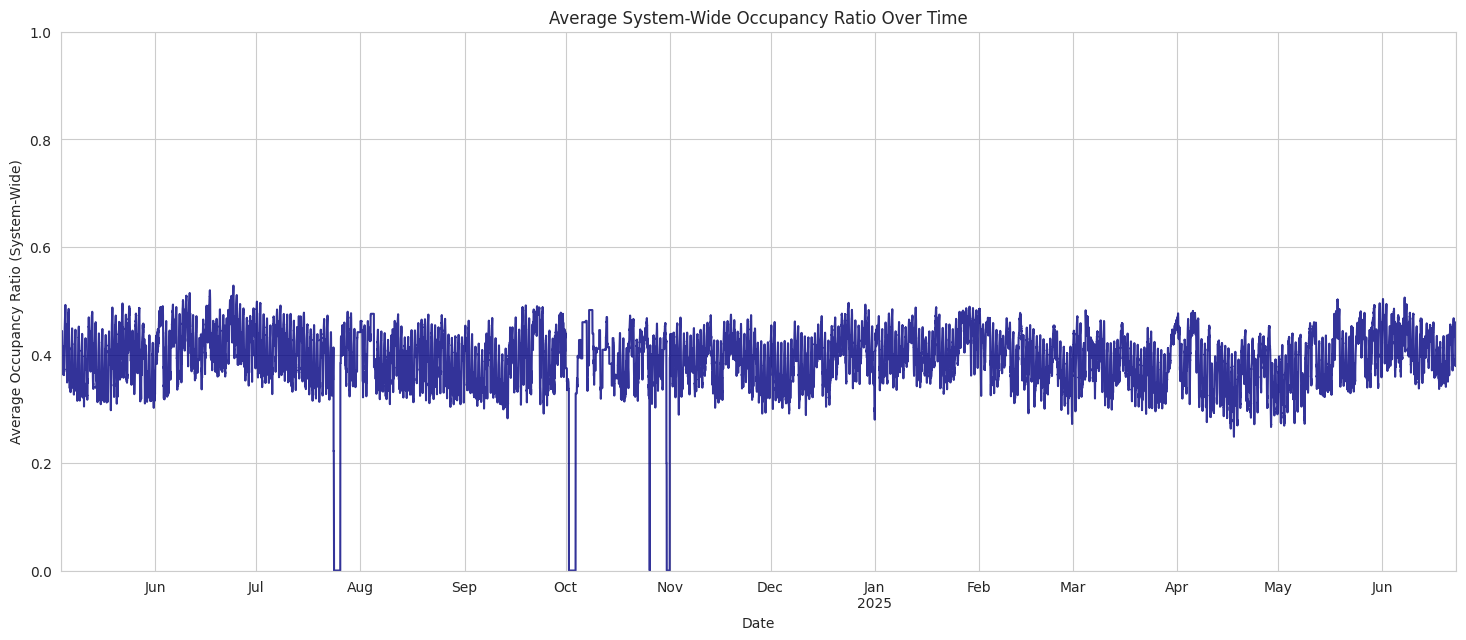


Analyzing: Are there clear daily and weekly patterns?


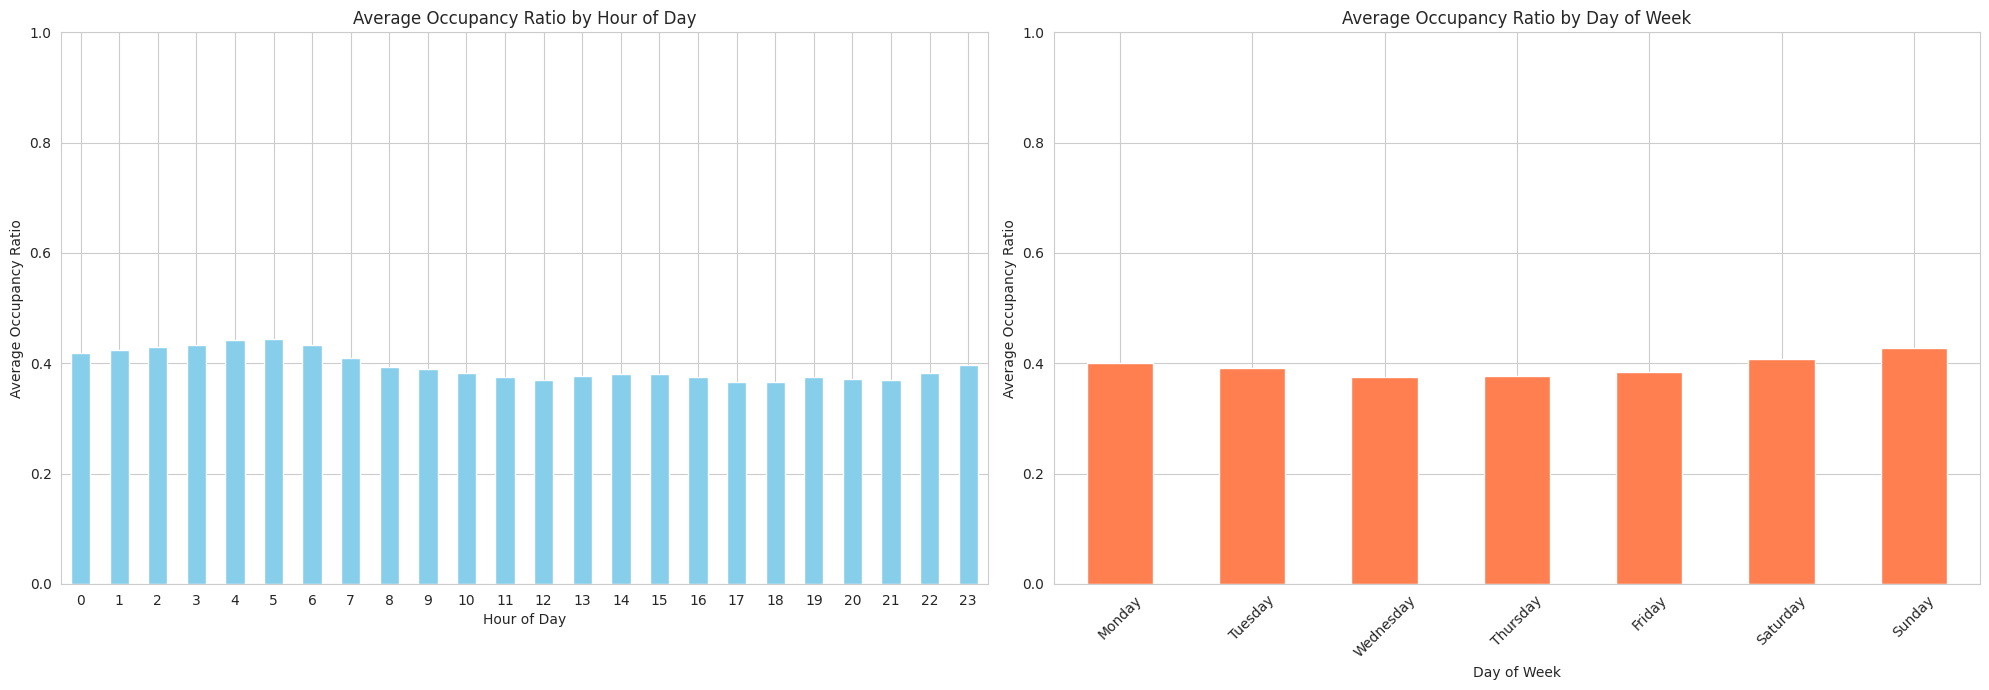


Analyzing: Are there seasonal or longer-term trends?


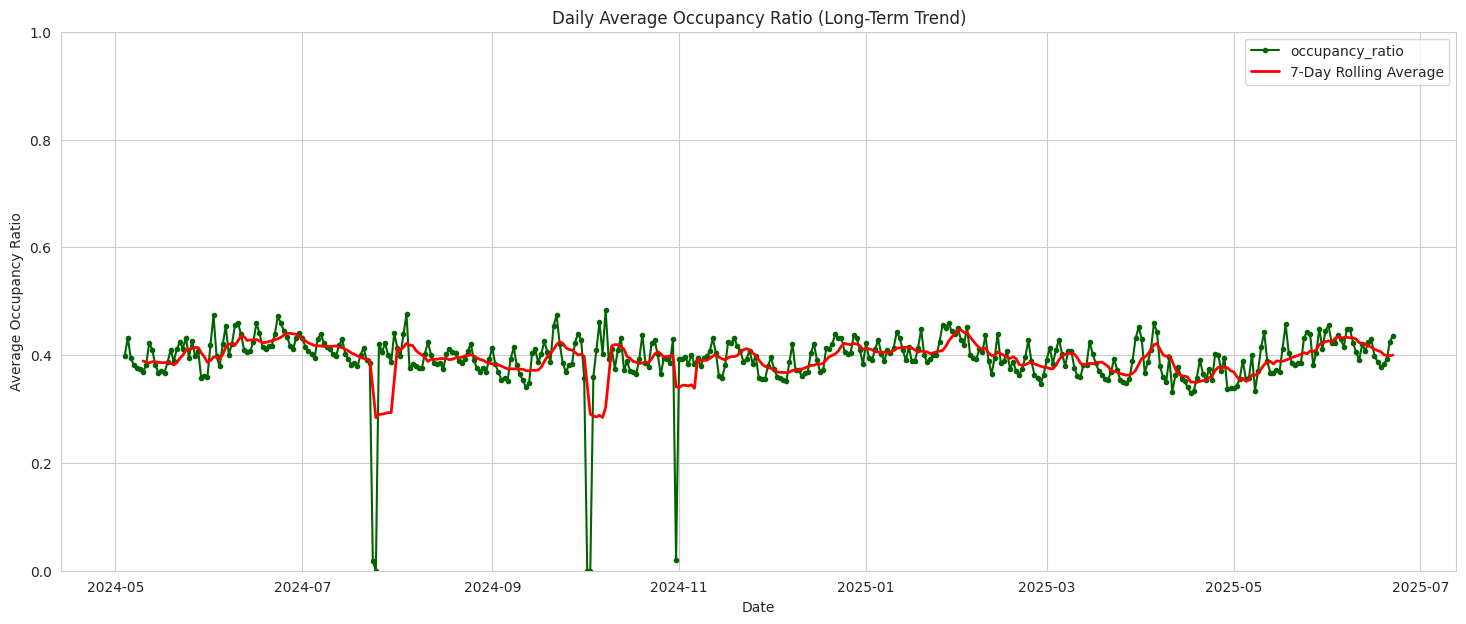


Analyzing: Which stations are the most and least popular?


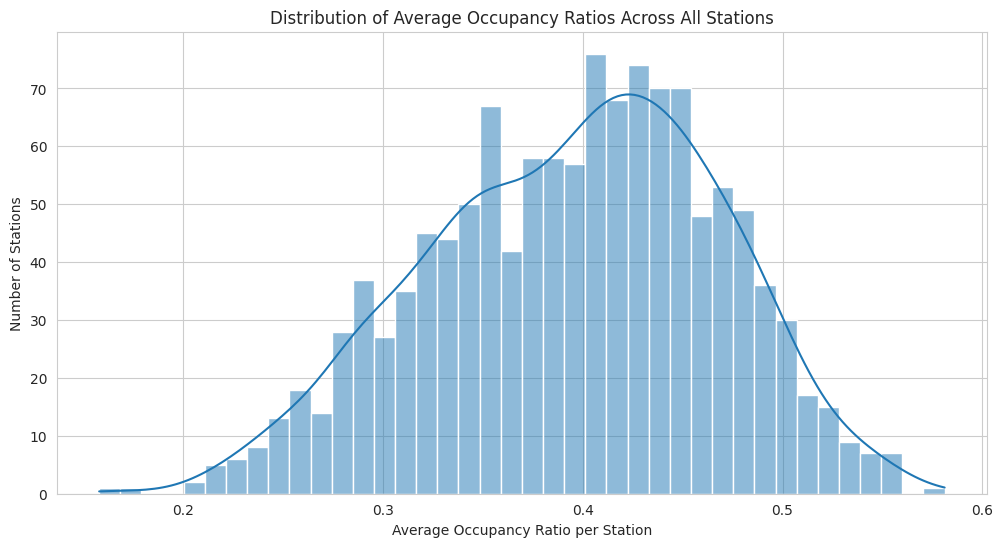


--- Station Leaderboard (Based on Average Occupancy) ---

Top 10 Stations Under HIGHEST Demand Pressure (Often Full):
sno
500109093    0.545620
500103068    0.546106
500106074    0.550700
500101229    0.551660
500103003    0.552491
500101199    0.556142
500104072    0.557238
500101176    0.557923
500113002    0.558403
500108127    0.581060
Name: occupancy_ratio, dtype: float64

Top 10 Stations Under LOWEST Demand Pressure (Often Empty):
sno
500119057    0.158200
500103026    0.175912
500101038    0.204073
500119068    0.210286
500109035    0.213362
500101132    0.217604
500119061    0.218291
500119049    0.219271
500110009    0.221273
500119064    0.223184
Name: occupancy_ratio, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_features is your DataFrame from the previous step
# df_features['time'] = pd.to_datetime(df_features['time']) # Ensure 'time' is datetime

print("--- Enhanced Baseline EDA (Focus on Occupancy Ratio) ---")

# Set a professional plot style
sns.set_style("whitegrid")

# --- 1. Overall Distribution Over Time ---
print("\nAnalyzing: What is the overall distribution over time?")
# We calculate the AVERAGE occupancy ratio for the entire system at each time point
system_wide_occupancy = df_features[df_features['act'] == 1].groupby('time')['occupancy_ratio'].mean()

plt.figure(figsize=(18, 7))
system_wide_occupancy.plot(title='Average System-Wide Occupancy Ratio Over Time', color='navy', alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Average Occupancy Ratio (System-Wide)')
plt.ylim(0, 1) # Occupancy ratio is always between 0 and 1
plt.show()


# --- 2. Daily & Weekly Patterns (Temporal Analysis) ---
print("\nAnalyzing: Are there clear daily and weekly patterns?")
# Create helper columns if they don't exist
if 'hour' not in df_features.columns:
    df_features['hour'] = df_features['time'].dt.hour
if 'day_of_week' not in df_features.columns:
    df_features['day_of_week'] = df_features['time'].dt.day_name()

# Plotting average occupancy by hour and day in a single figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Hourly Patterns
avg_occ_by_hour = df_features[df_features['act'] == 1].groupby('hour')['occupancy_ratio'].mean()
avg_occ_by_hour.plot(kind='bar', ax=ax1, title='Average Occupancy Ratio by Hour of Day', color='skyblue')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average Occupancy Ratio')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='x', rotation=0)

# Weekly Patterns
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_occ_by_day = df_features[df_features['act'] == 1].groupby('day_of_week')['occupancy_ratio'].mean().reindex(day_order)
avg_occ_by_day.plot(kind='bar', ax=ax2, title='Average Occupancy Ratio by Day of Week', color='coral')
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Average Occupancy Ratio')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# --- 3. Seasonal / Long-Term Trends ---
print("\nAnalyzing: Are there seasonal or longer-term trends?")
# We'll aggregate by date to see the trend over the entire period
df_features['date'] = df_features['time'].dt.date
avg_occ_by_date = df_features[df_features['act'] == 1].groupby('date')['occupancy_ratio'].mean()

plt.figure(figsize=(18, 7))
avg_occ_by_date.plot(title='Daily Average Occupancy Ratio (Long-Term Trend)', color='darkgreen', marker='.', linestyle='-')
# Add a rolling average to smooth out daily noise and see the trend more clearly
avg_occ_by_date.rolling(window=7).mean().plot(color='red', linewidth=2, label='7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Average Occupancy Ratio')
plt.ylim(0, 1)
plt.legend()
plt.show()


# --- 4. Station Popularity (Demand Pressure) ---
print("\nAnalyzing: Which stations are the most and least popular?")
# Here, popularity is defined by demand pressure (average occupancy)
avg_occupancy_by_station = df_features[df_features['act'] == 1].groupby('sno')['occupancy_ratio'].mean().sort_values()

# Plotting the distribution of average station occupancies
plt.figure(figsize=(12, 6))
sns.histplot(avg_occupancy_by_station, bins=40, kde=True)
plt.title('Distribution of Average Occupancy Ratios Across All Stations')
plt.xlabel('Average Occupancy Ratio per Station')
plt.ylabel('Number of Stations')
plt.show()

print("\n--- Station Leaderboard (Based on Average Occupancy) ---")
print("\nTop 10 Stations Under HIGHEST Demand Pressure (Often Full):")
print(avg_occupancy_by_station.tail(10))

print("\nTop 10 Stations Under LOWEST Demand Pressure (Often Empty):")
print(avg_occupancy_by_station.head(10))

/tmp/ipython-input-1453132991.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  system_wide_occupancy.fillna(method='ffill', inplace=True)


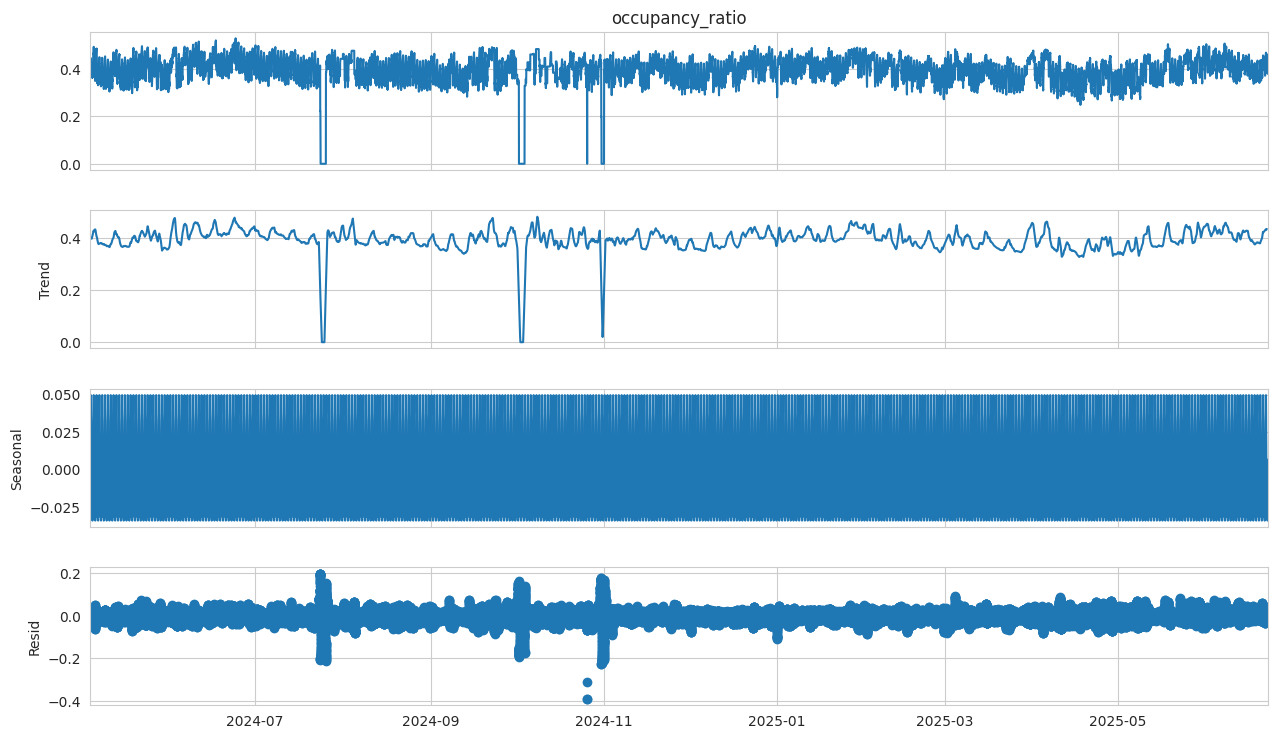

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# It's best to do this on a single, representative station or the system-wide average
# Let's use the system-wide average occupancy we calculated before
system_wide_occupancy = df_features[df_features['act'] == 1].groupby('time')['occupancy_ratio'].mean().asfreq('10min')

# Fill any missing values for the decomposition to work
system_wide_occupancy.fillna(method='ffill', inplace=True)

# The period is how many data points make up a full season.
# For daily seasonality with 10-minute data: 6 points/hour * 24 hours/day = 144
daily_period = 144

decomposition = seasonal_decompose(system_wide_occupancy, model='additive', period=daily_period)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()


--- Analyzing Station Popularity (including District) ---


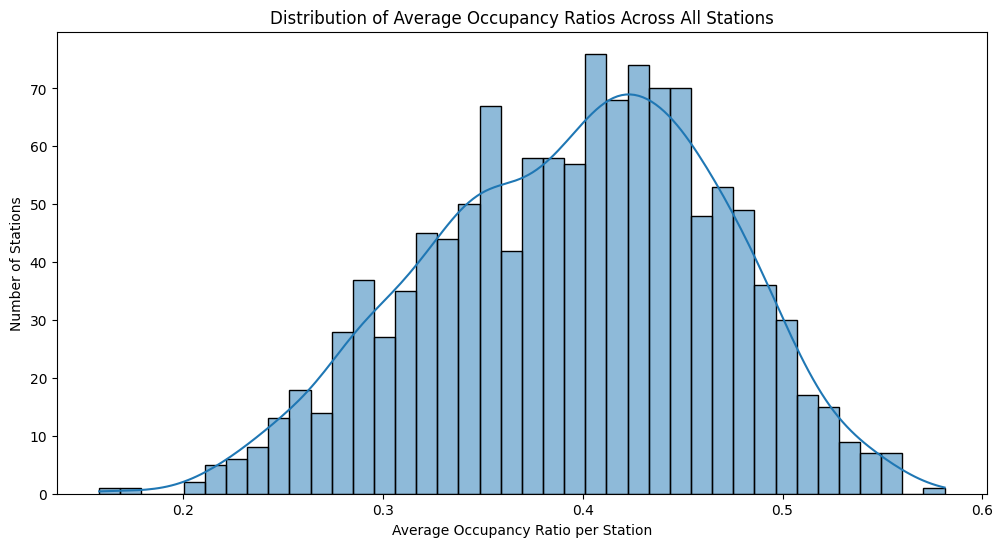


--- Station Leaderboard (Based on Average Occupancy) ---

Top 10 Stations Under HIGHEST Demand Pressure (Often Full):
                   sareaen  avg_occupancy_ratio
sno                                            
500109093      Beitou Dist             0.545620
500103068      Datong Dist             0.546106
500106074  Zhongzheng Dist             0.550700
500101229       Daan Dist.             0.551660
500103003      Datong Dist             0.552491
500101199       Daan Dist.             0.556142
500104072      Shilin Dist             0.557238
500101176       Daan Dist.             0.557923
500113002      Wanhua Dist             0.558403
500108127       Neihu Dist             0.581060

Top 10 Stations Under LOWEST Demand Pressure (Often Empty):
                 sareaen  avg_occupancy_ratio
sno                                          
500119057       NTU Dist             0.158200
500103026    Datong Dist             0.175912
500101038     Daan Dist.             0.204073
500119068     

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Make sure your district column has a consistent name ---
# ⚠️ IMPORTANT: Replace 'sareaen' with the actual name of your district column if different.
DISTRICT_COL = 'sareaen'

print("\n--- Analyzing Station Popularity (including District) ---")

# --- Plotting the distribution (this part remains the same) ---
# Calculate average occupancy per station
avg_occupancy_by_station = df_features[df_features['act'] == 1].groupby('sno')['occupancy_ratio'].mean()

# Plot the overall distribution of station popularities
plt.figure(figsize=(12, 6))
sns.histplot(avg_occupancy_by_station, bins=40, kde=True)
plt.title('Distribution of Average Occupancy Ratios Across All Stations')
plt.xlabel('Average Occupancy Ratio per Station')
plt.ylabel('Number of Stations')
plt.show()


# --- Building the Leaderboard with District Info ---
# 1. Get a unique mapping of station number to its district
station_to_district_map = df_features[['sno', DISTRICT_COL]].drop_duplicates().set_index('sno')

# 2. Convert the occupancy series to a DataFrame and join with the district map
station_leaderboard = avg_occupancy_by_station.to_frame(name='avg_occupancy_ratio').join(station_to_district_map)

# 3. Sort the combined DataFrame by the average occupancy ratio
station_leaderboard.sort_values('avg_occupancy_ratio', inplace=True)


# --- Print the Enriched Leaderboard ---
print("\n--- Station Leaderboard (Based on Average Occupancy) ---")

print("\nTop 10 Stations Under HIGHEST Demand Pressure (Often Full):")
# Display the district and the average occupancy ratio
print(station_leaderboard[[DISTRICT_COL, 'avg_occupancy_ratio']].tail(10))

print("\nTop 10 Stations Under LOWEST Demand Pressure (Often Empty):")
# Display the district and the average occupancy ratio
print(station_leaderboard[[DISTRICT_COL, 'avg_occupancy_ratio']].head(10))

--- Generating Individual Plots for Key Months in 2024 ---


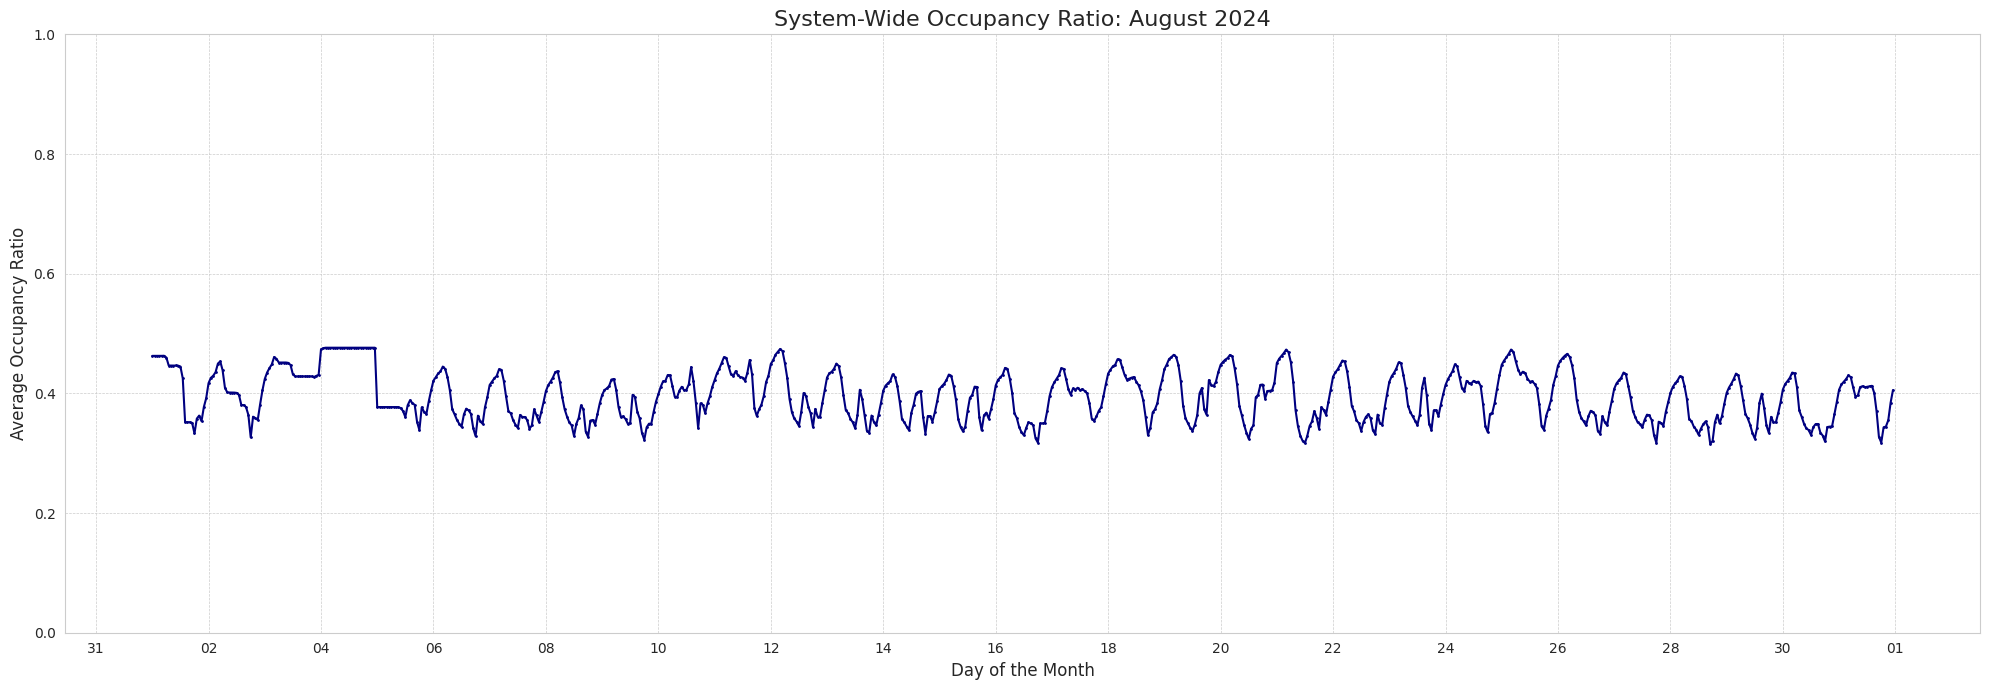

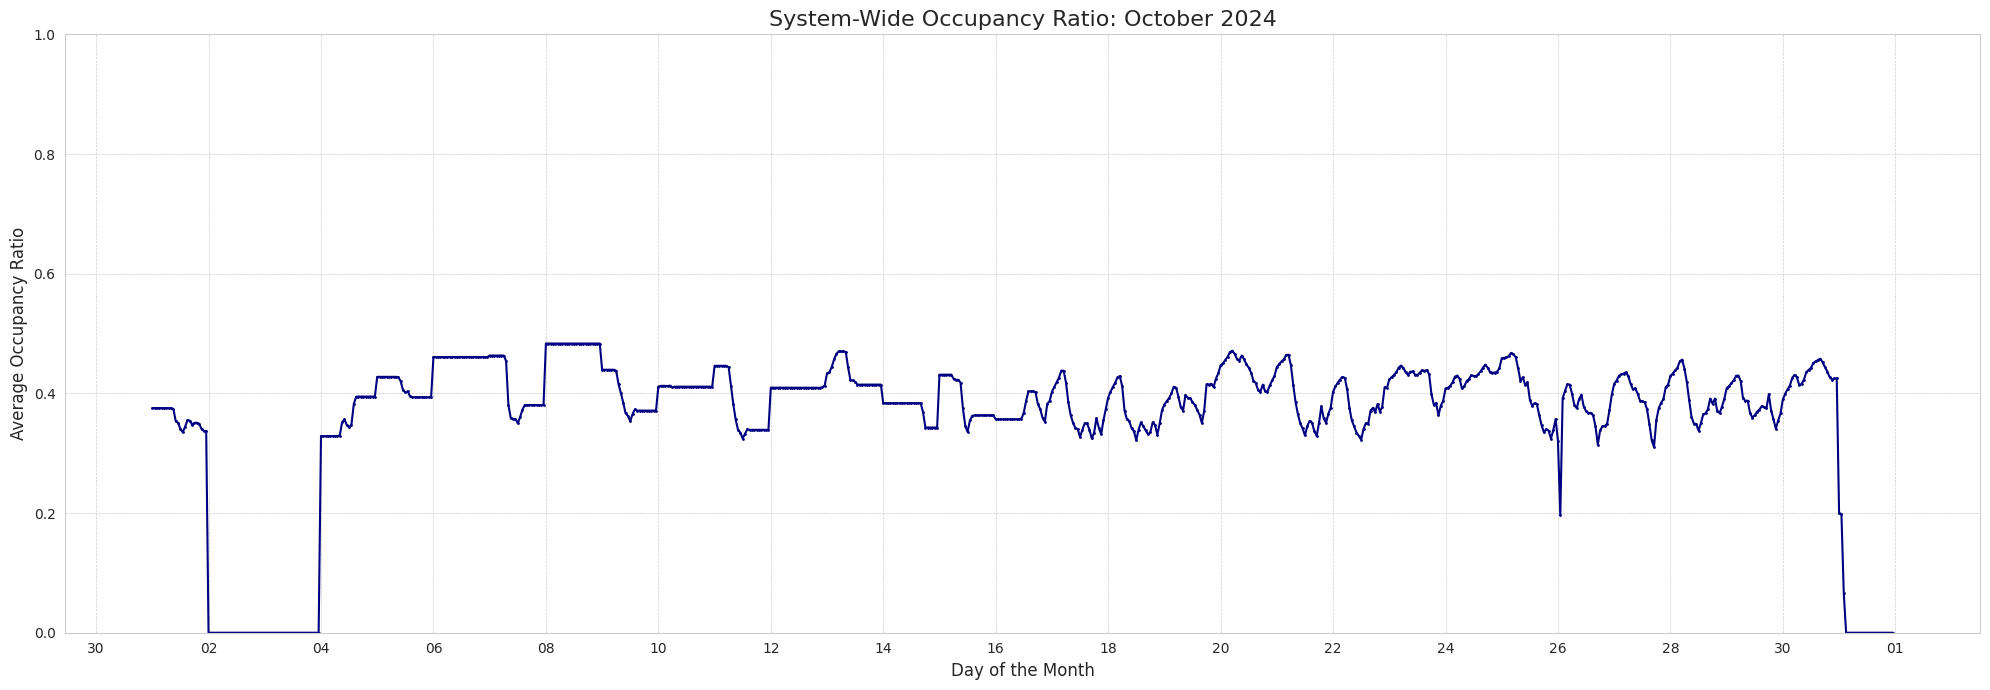

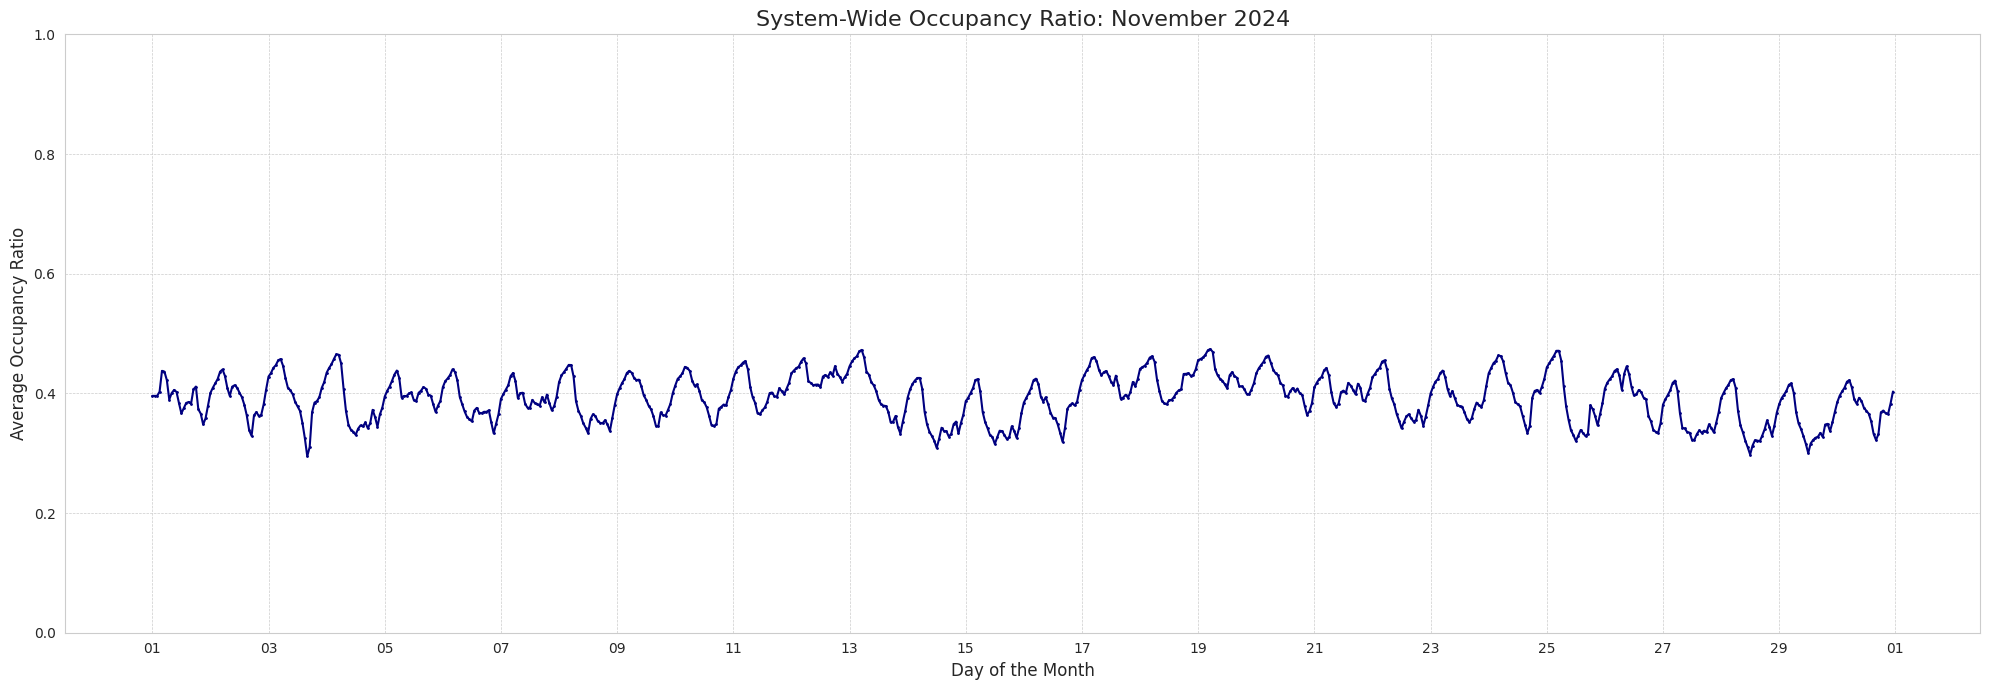

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# --- Setup: Ensure data is ready ---
# Assuming df_features is loaded and 'time' is a datetime object
if 'time' not in df_features.columns:
    df_features.reset_index(inplace=True) # Bring 'time' back if it's the index
df_features['time'] = pd.to_datetime(df_features['time'])

sns.set_style("whitegrid")

# --- List of months we want to analyze ---
months_to_plot = ['08', '10', '11']
year = 2024

print(f"--- Generating Individual Plots for Key Months in {year} ---")

for month_str in months_to_plot:
    # --- 1. Filter data for the specific month ---
    start_date = f'{year}-{month_str}-01'
    # Create a boolean mask for the month
    month_mask = (df_features['time'] >= start_date) & \
                 (df_features['time'] < (pd.to_datetime(start_date) + pd.DateOffset(months=1)))
    month_data = df_features[month_mask]

    if month_data.empty:
        print(f"\nNo data found for month {month_str}/{year}.")
        continue

    # --- 2. Resample to get a smooth hourly average ---
    # Set time as index for resampling
    month_data = month_data.set_index('time')
    avg_occupancy = month_data[month_data['act'] == 1]['occupancy_ratio'].resample('h').mean()

    # --- 3. Create the Plot ---
    fig, ax = plt.subplots(figsize=(20, 7))
    ax.plot(avg_occupancy.index, avg_occupancy, label='Hourly Avg Occupancy', color='navy', marker='.', markersize=2, linestyle='-')

    # --- Formatting for clarity ---
    month_name = pd.to_datetime(start_date).strftime('%B')
    ax.set_title(f'System-Wide Occupancy Ratio: {month_name} {year}', fontsize=16)
    ax.set_xlabel('Day of the Month', fontsize=12)
    ax.set_ylabel('Average Occupancy Ratio', fontsize=12)
    ax.set_ylim(0, 1)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Format x-axis to clearly show the days
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) # A tick every 2 days
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d')) # Show only the day number
    ax.tick_params(axis='x', rotation=0)

    plt.tight_layout()
    plt.show()

--- Generating Individual Monthly Occupancy Plots ---


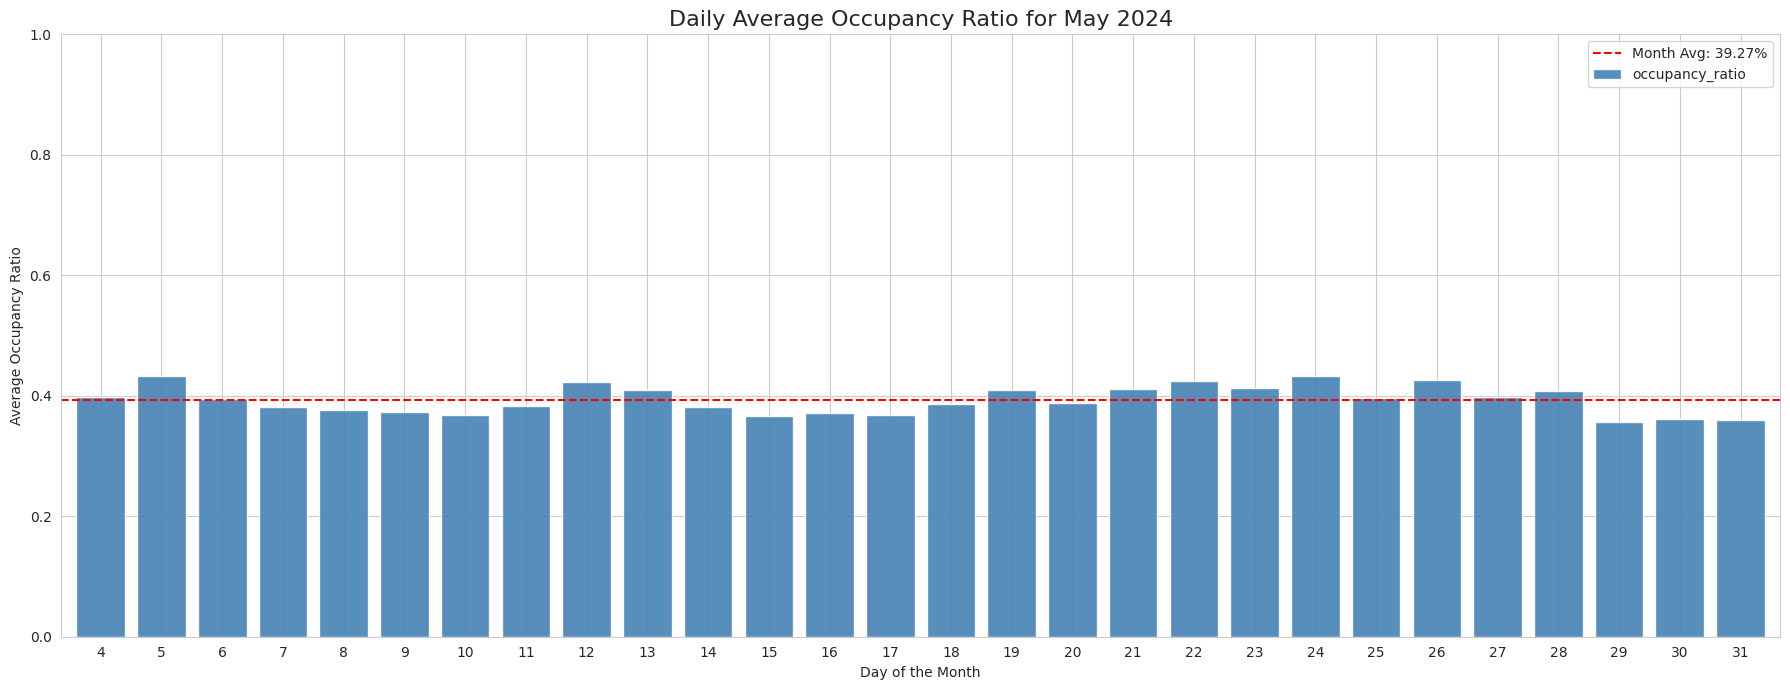

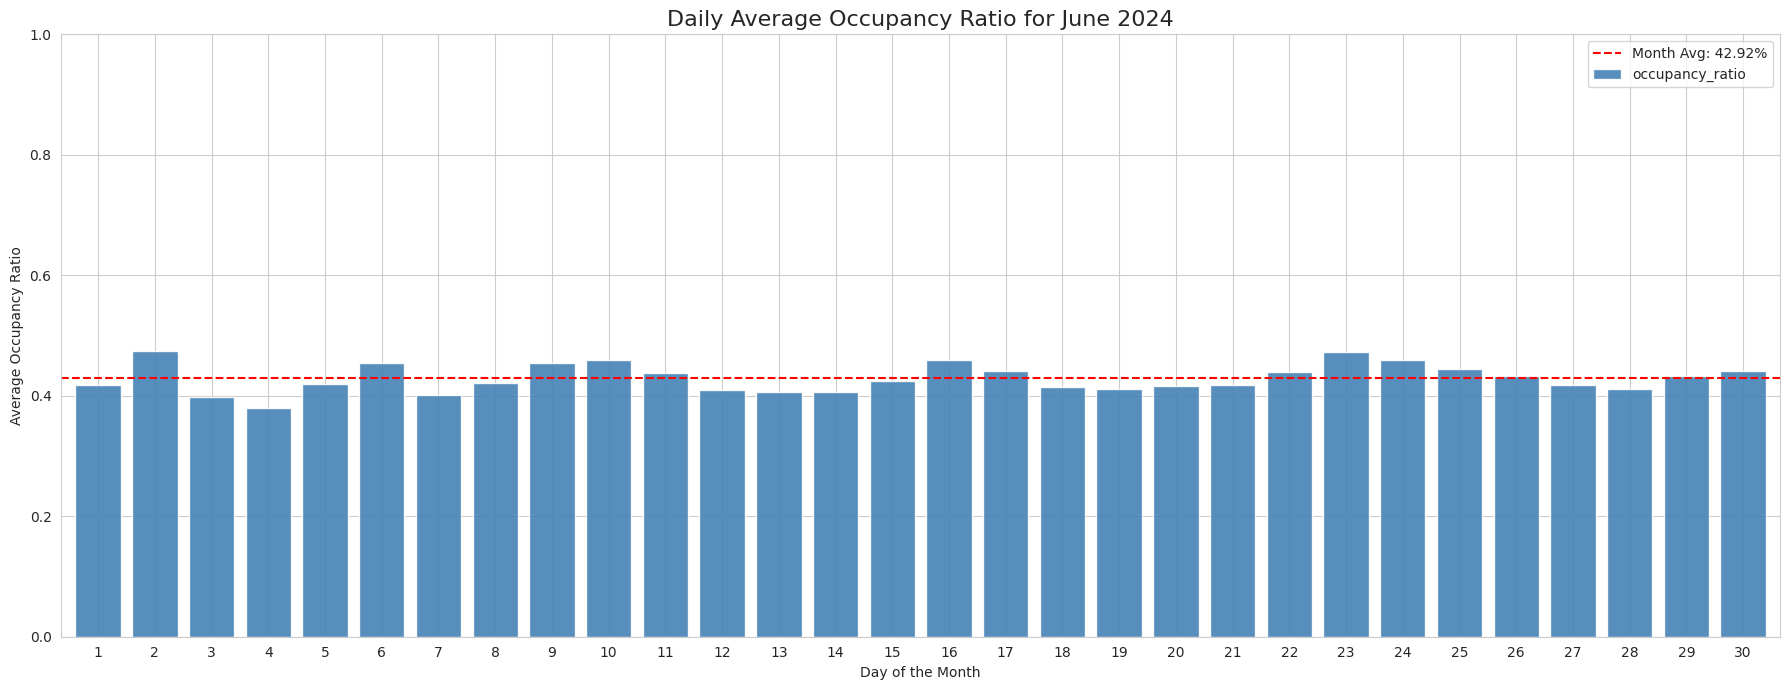

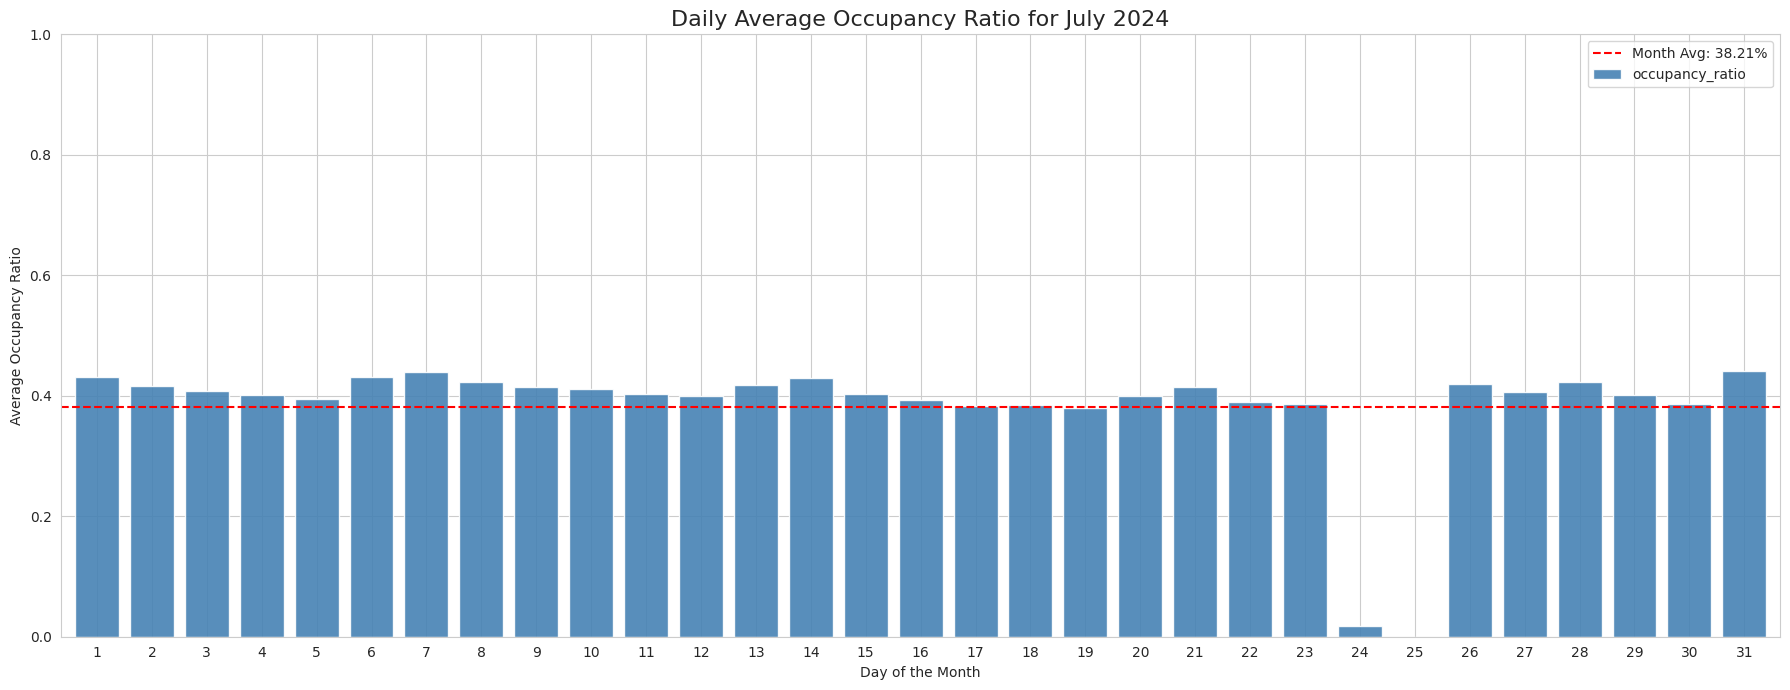

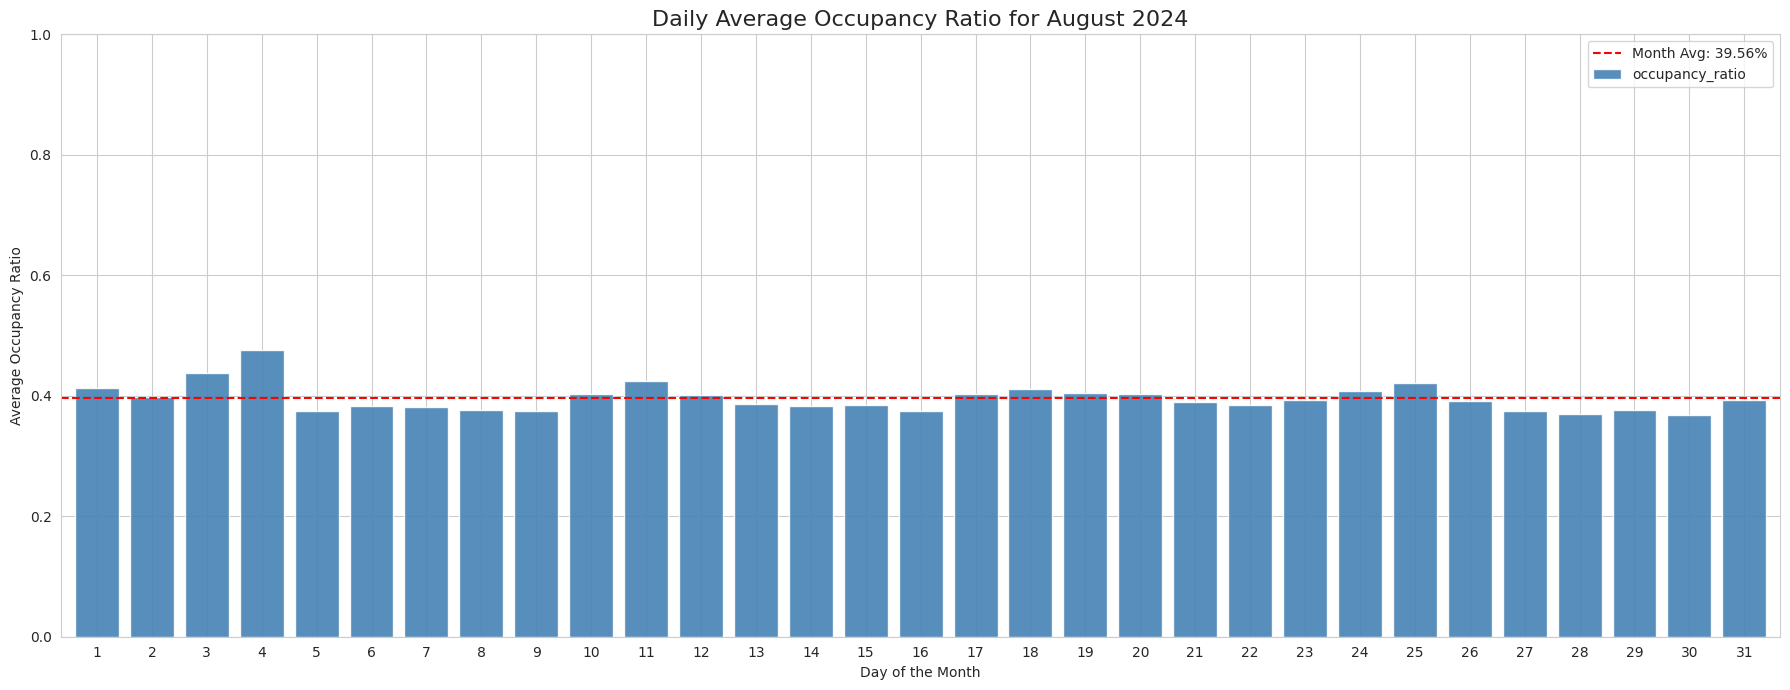

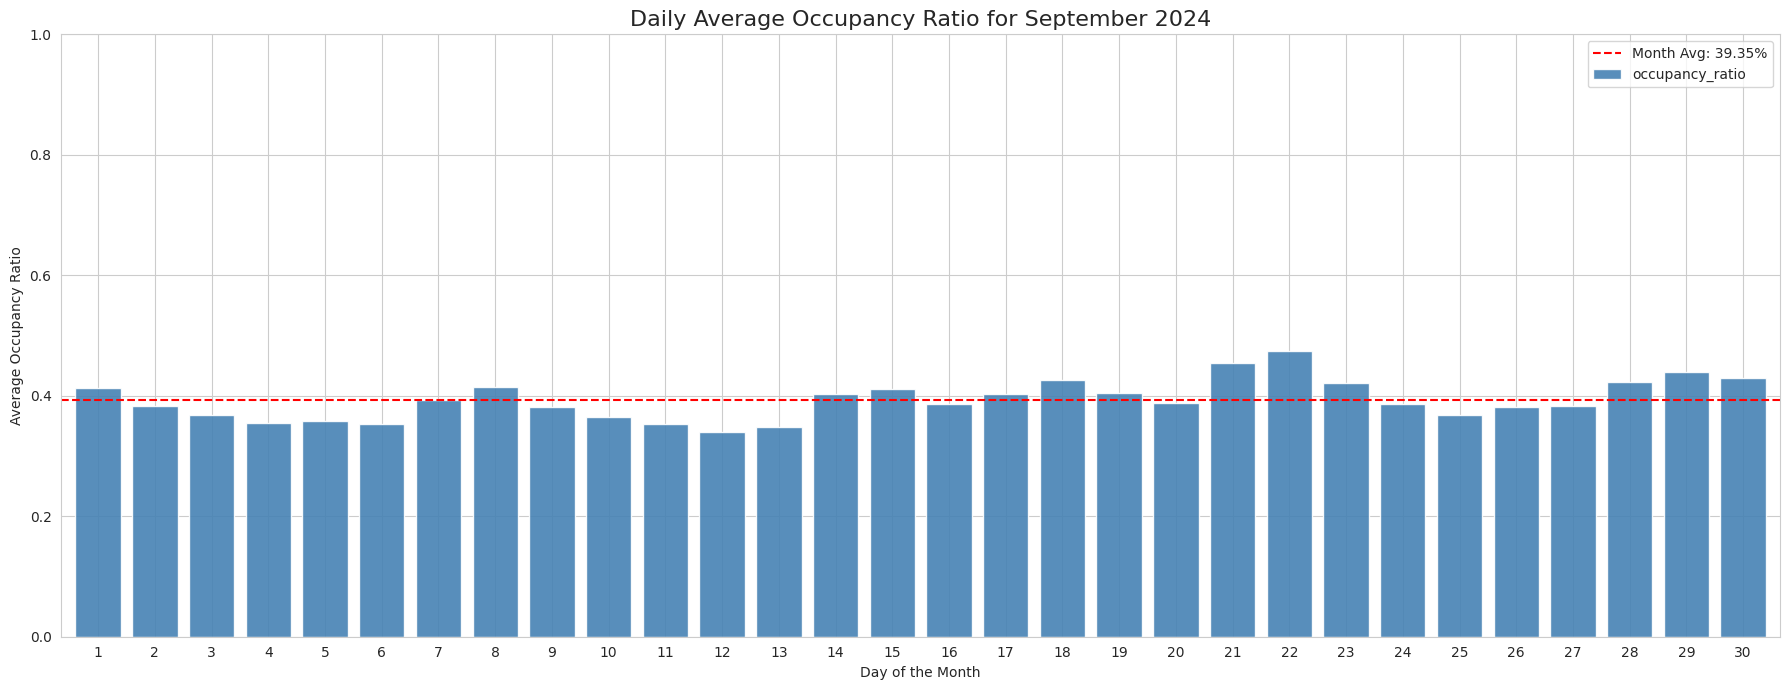

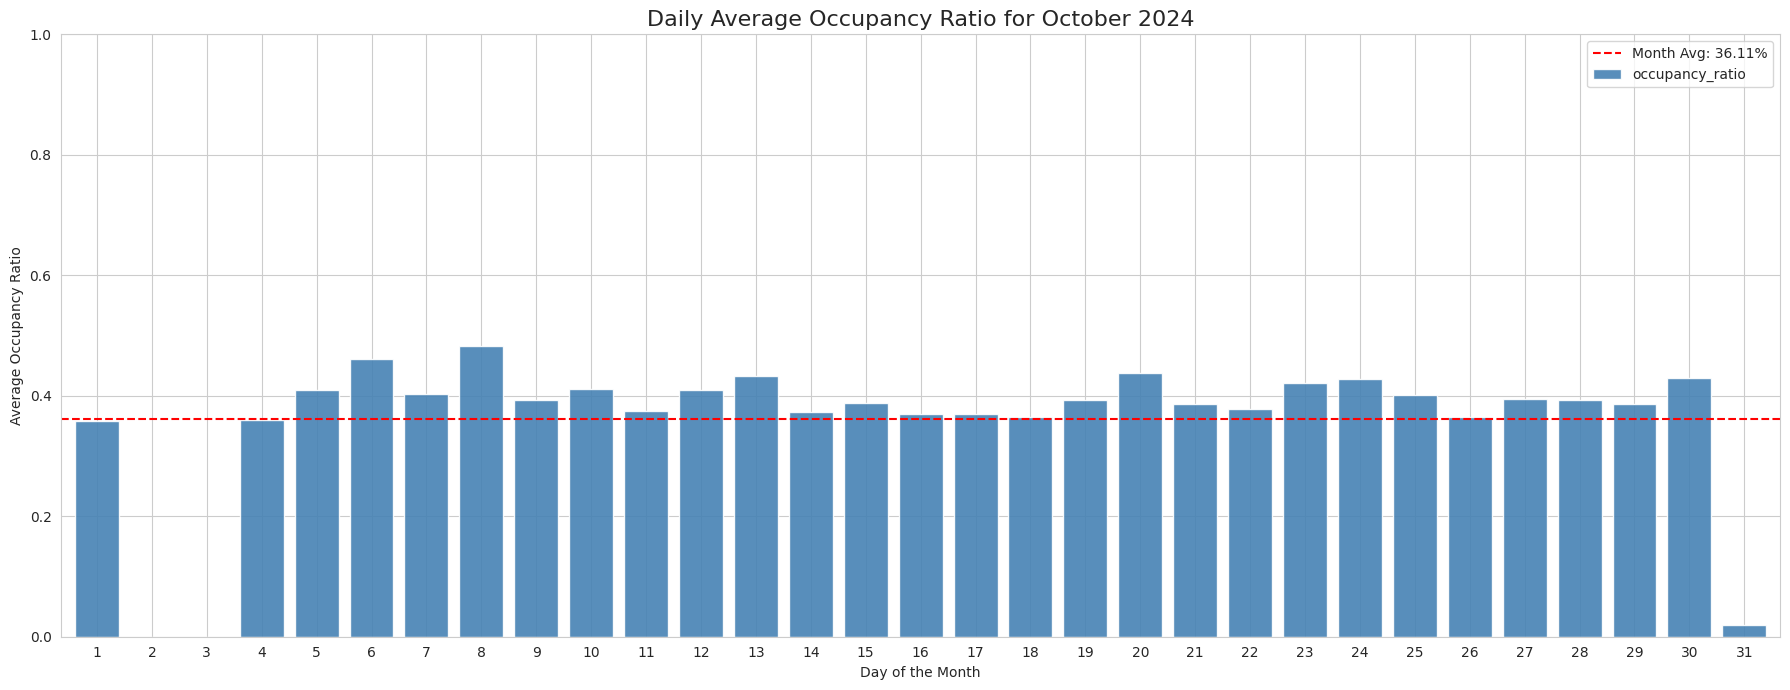

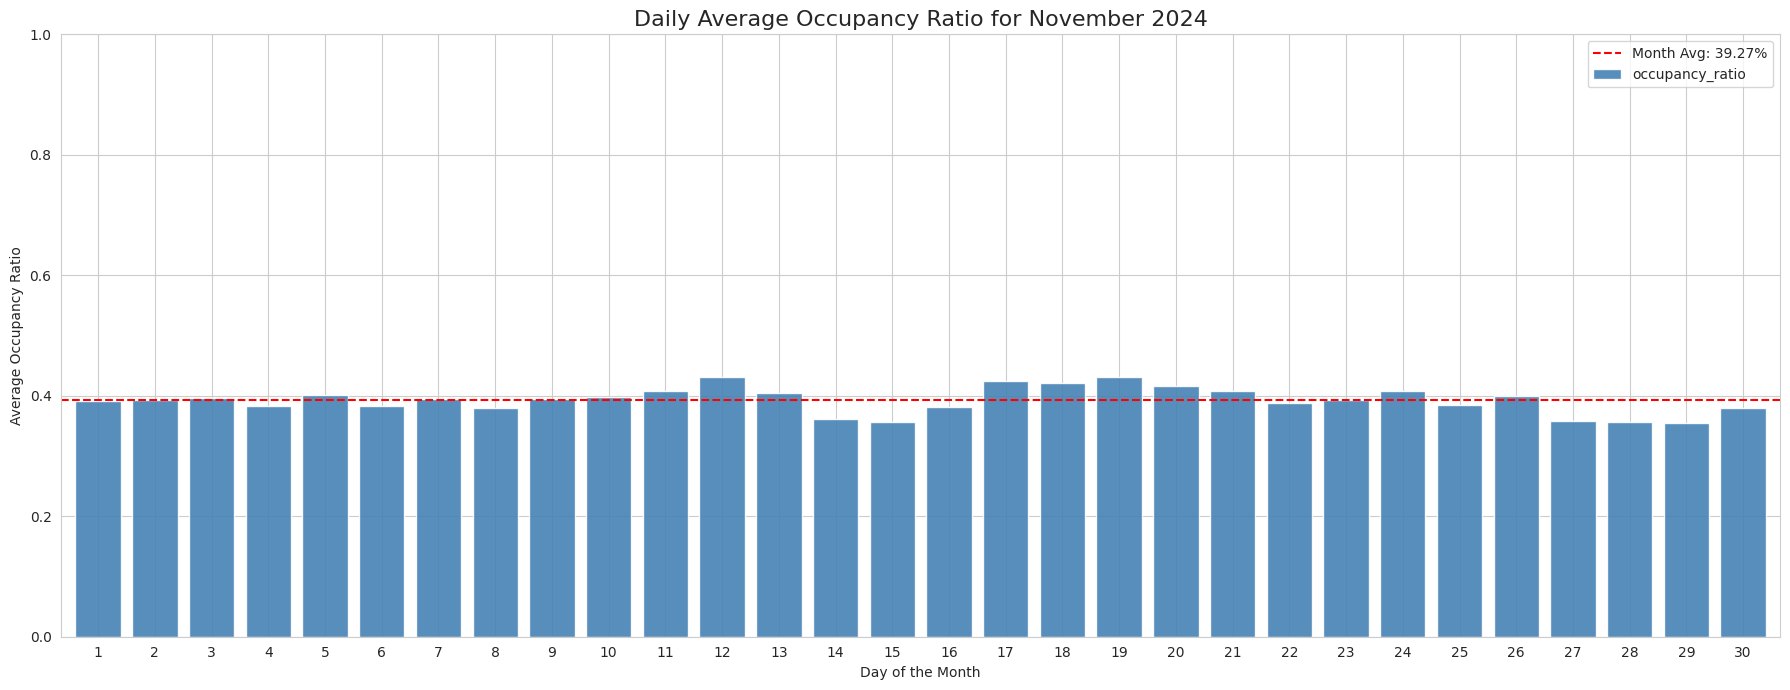

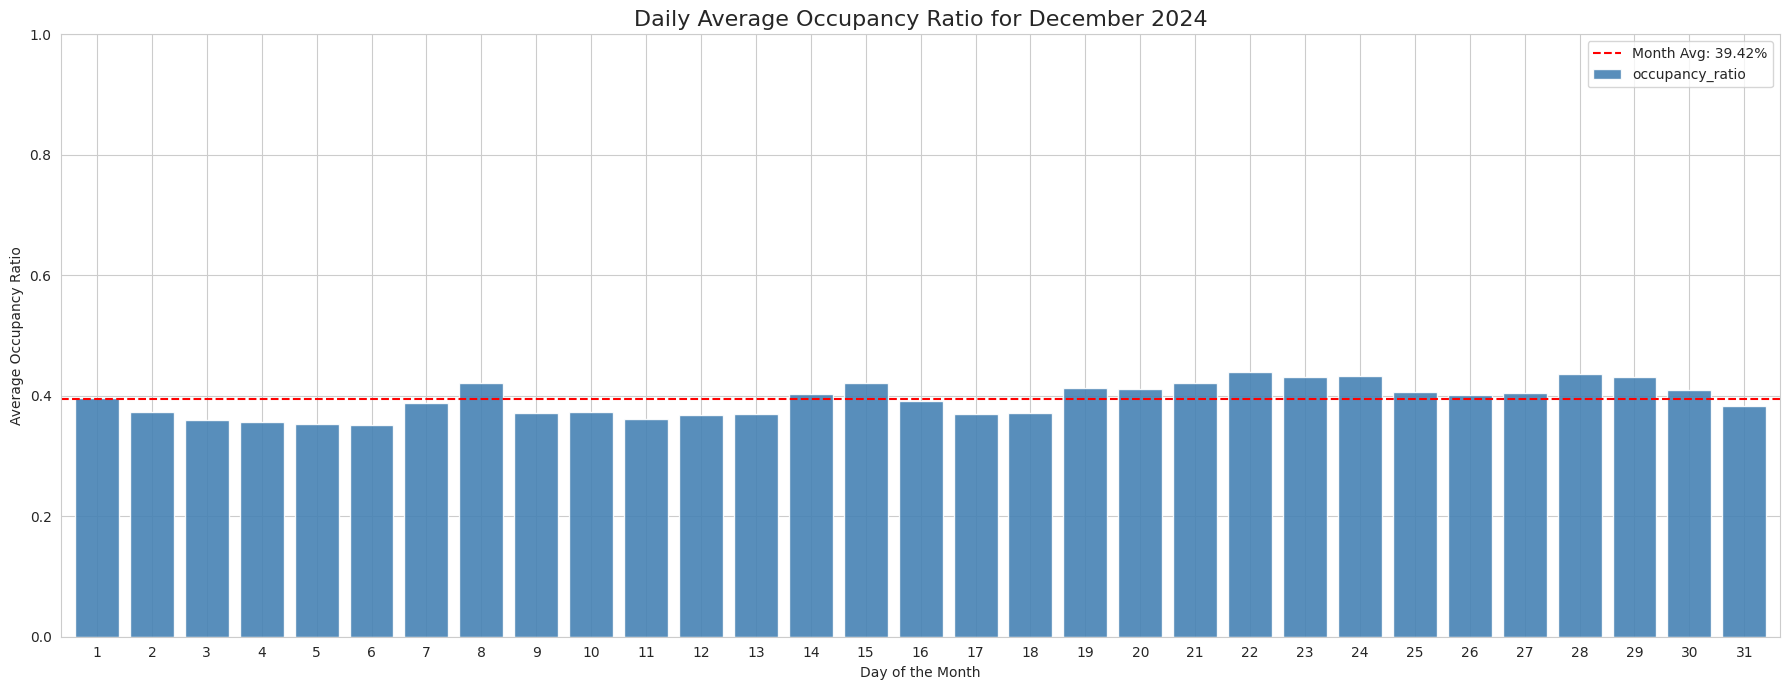

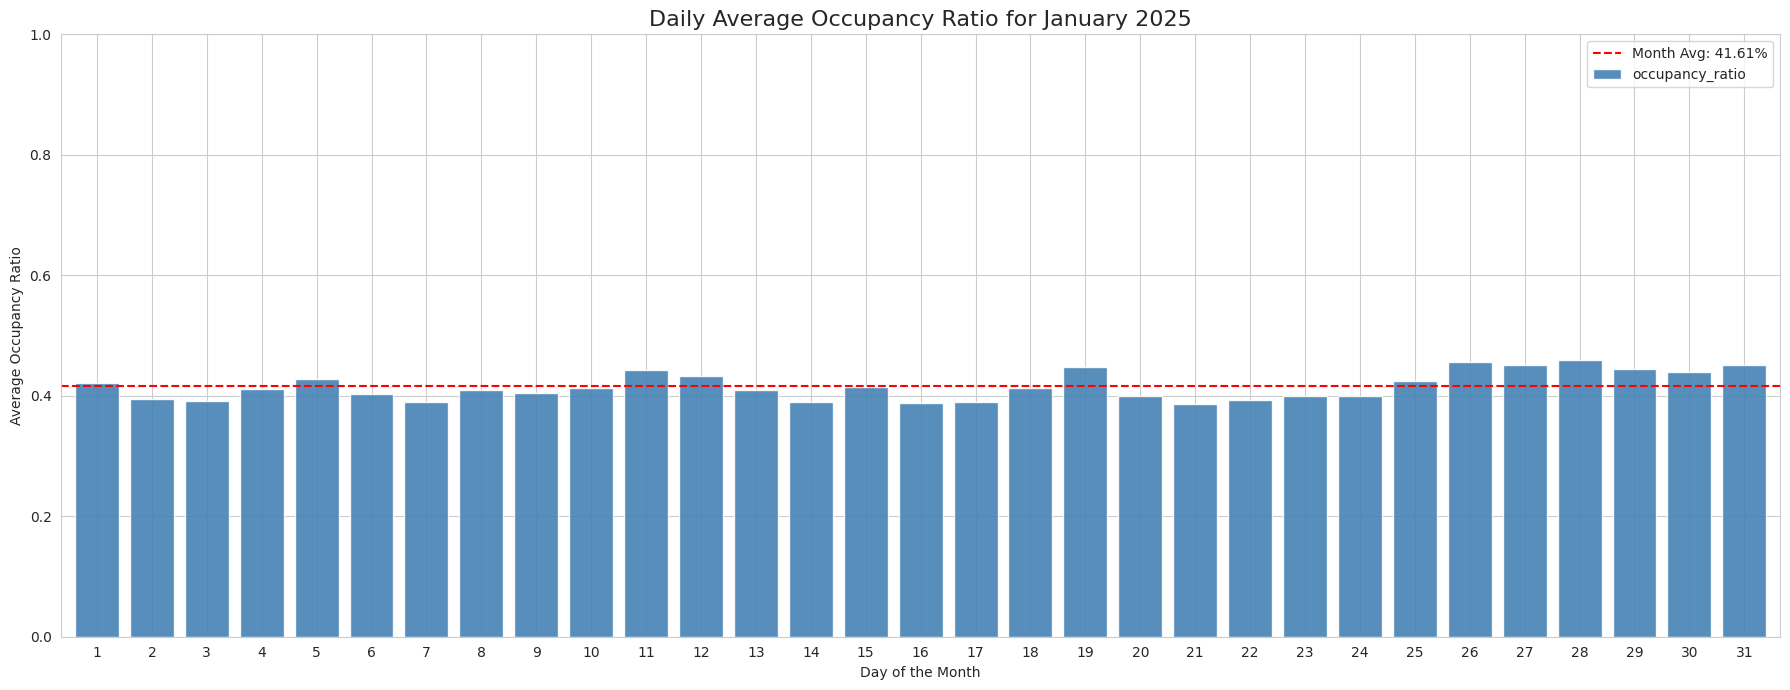

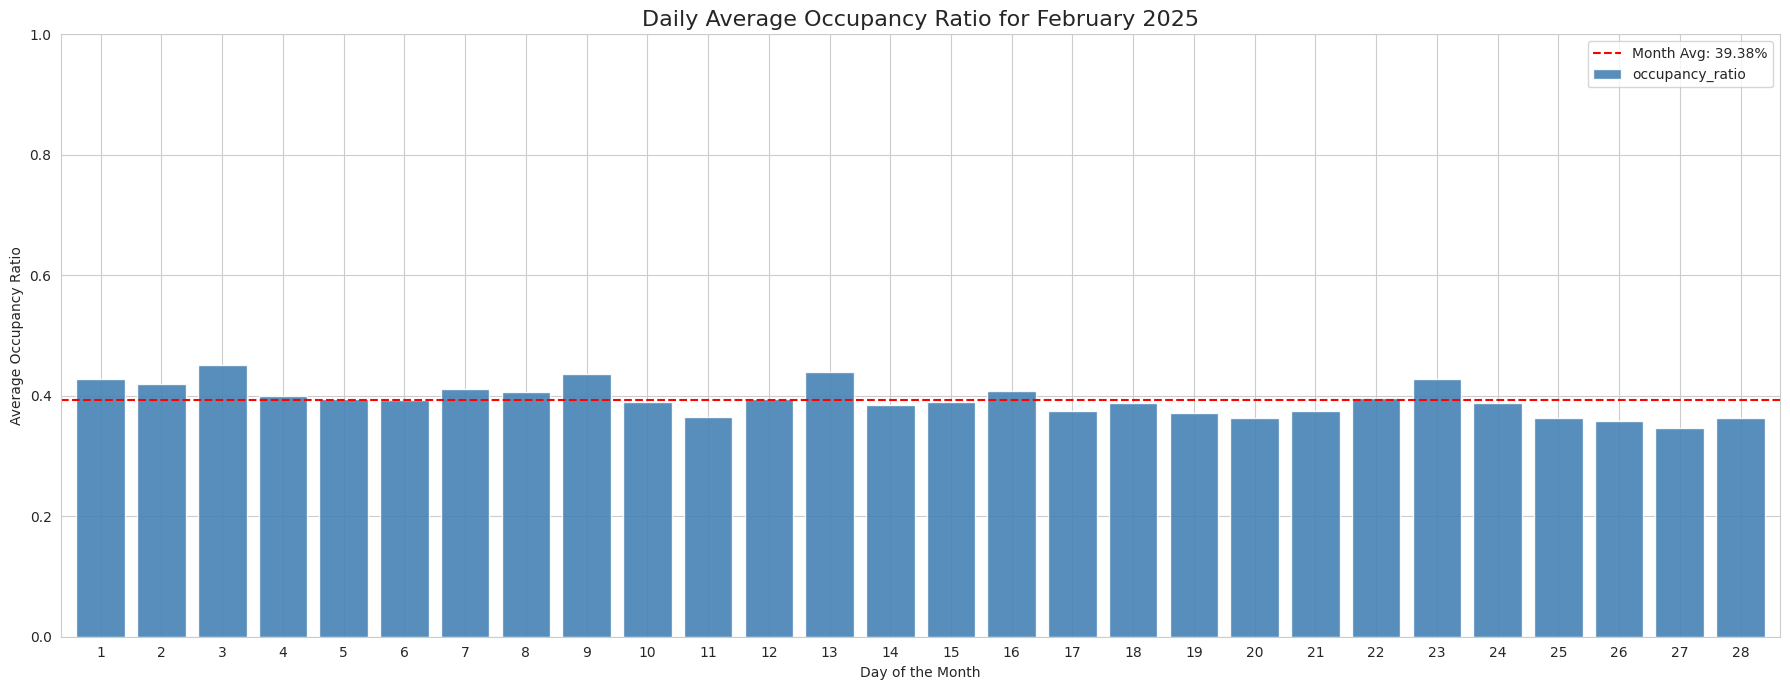

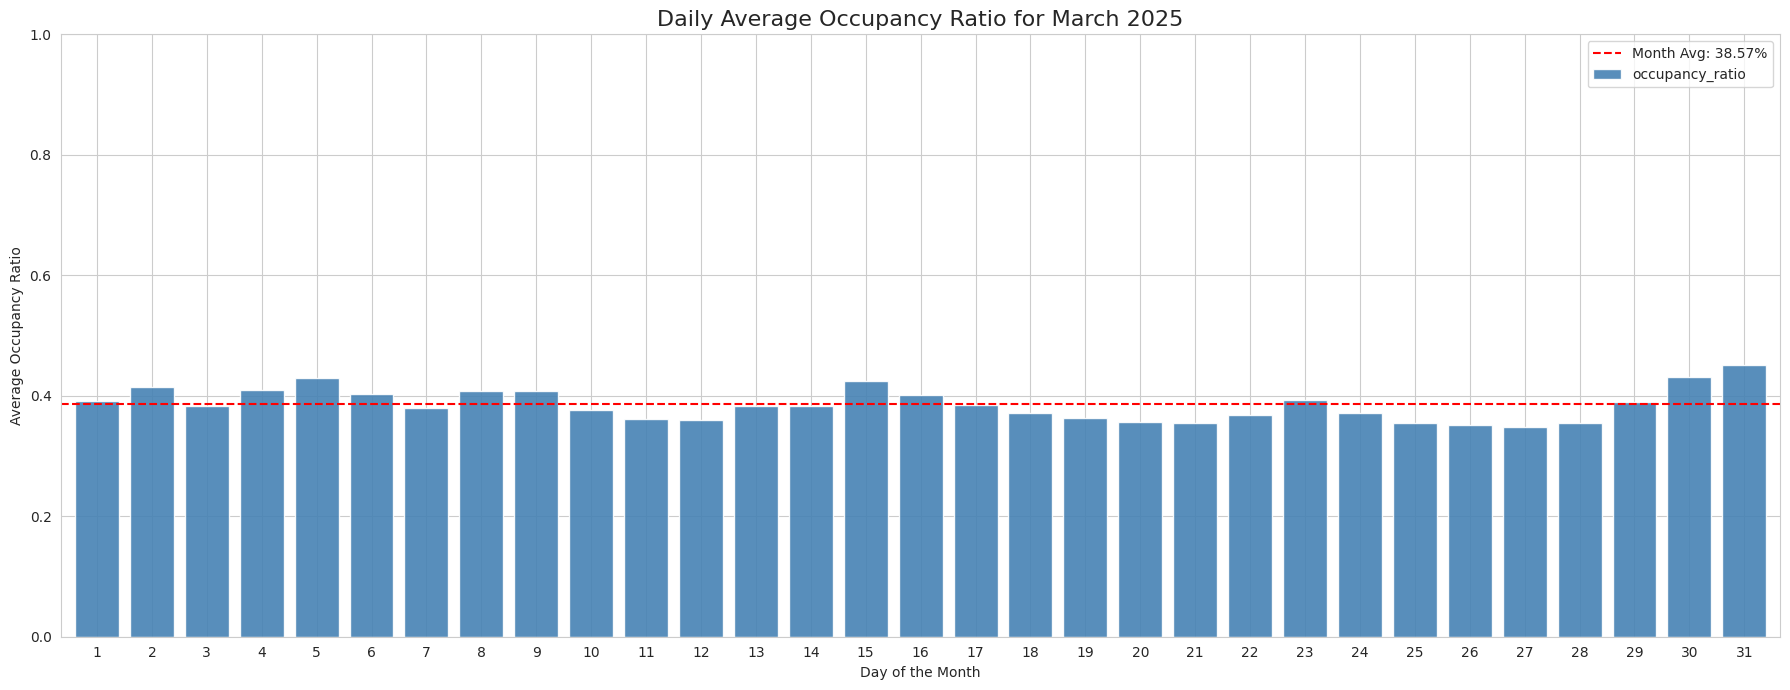

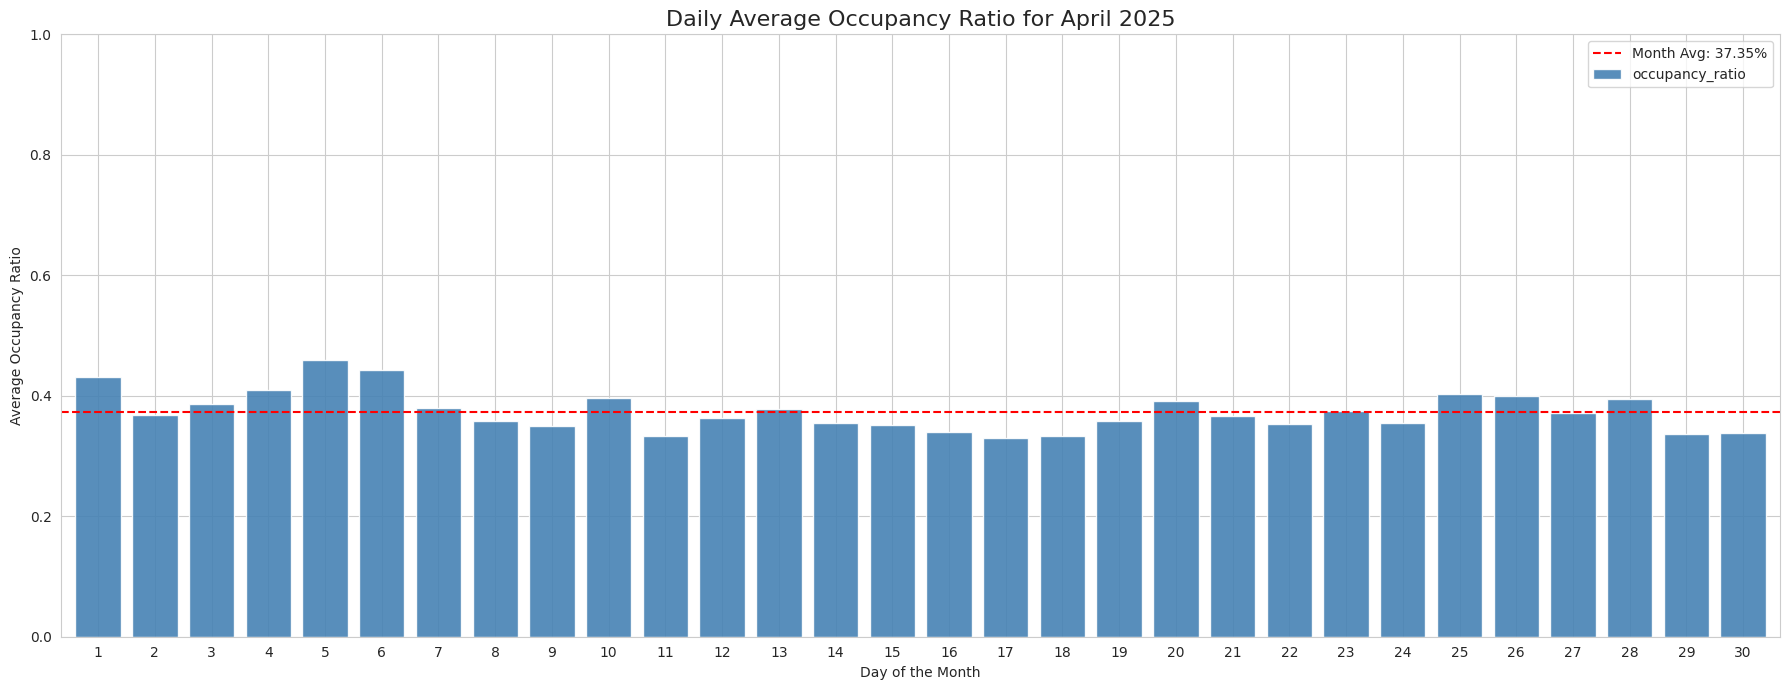

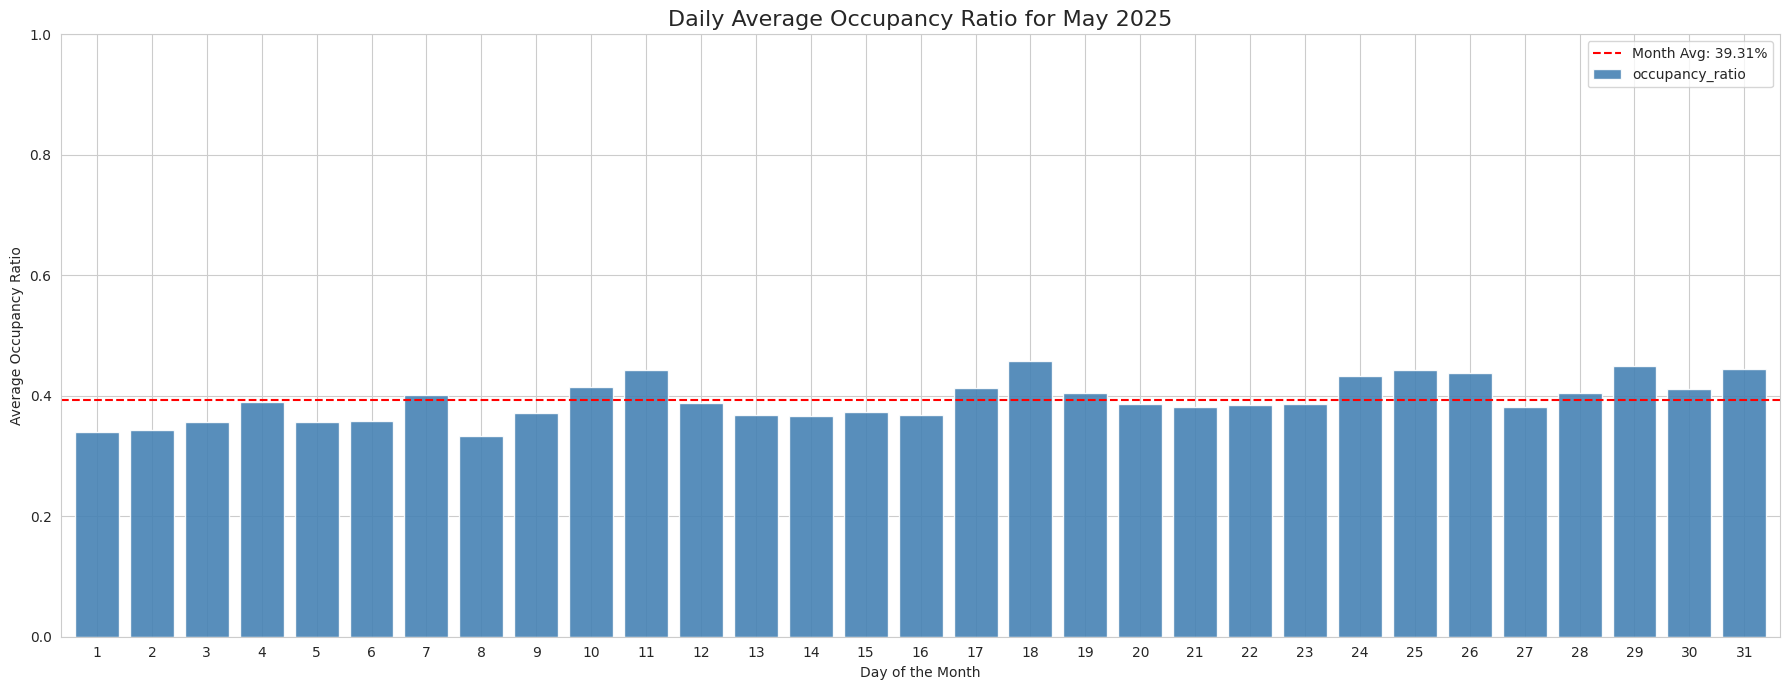

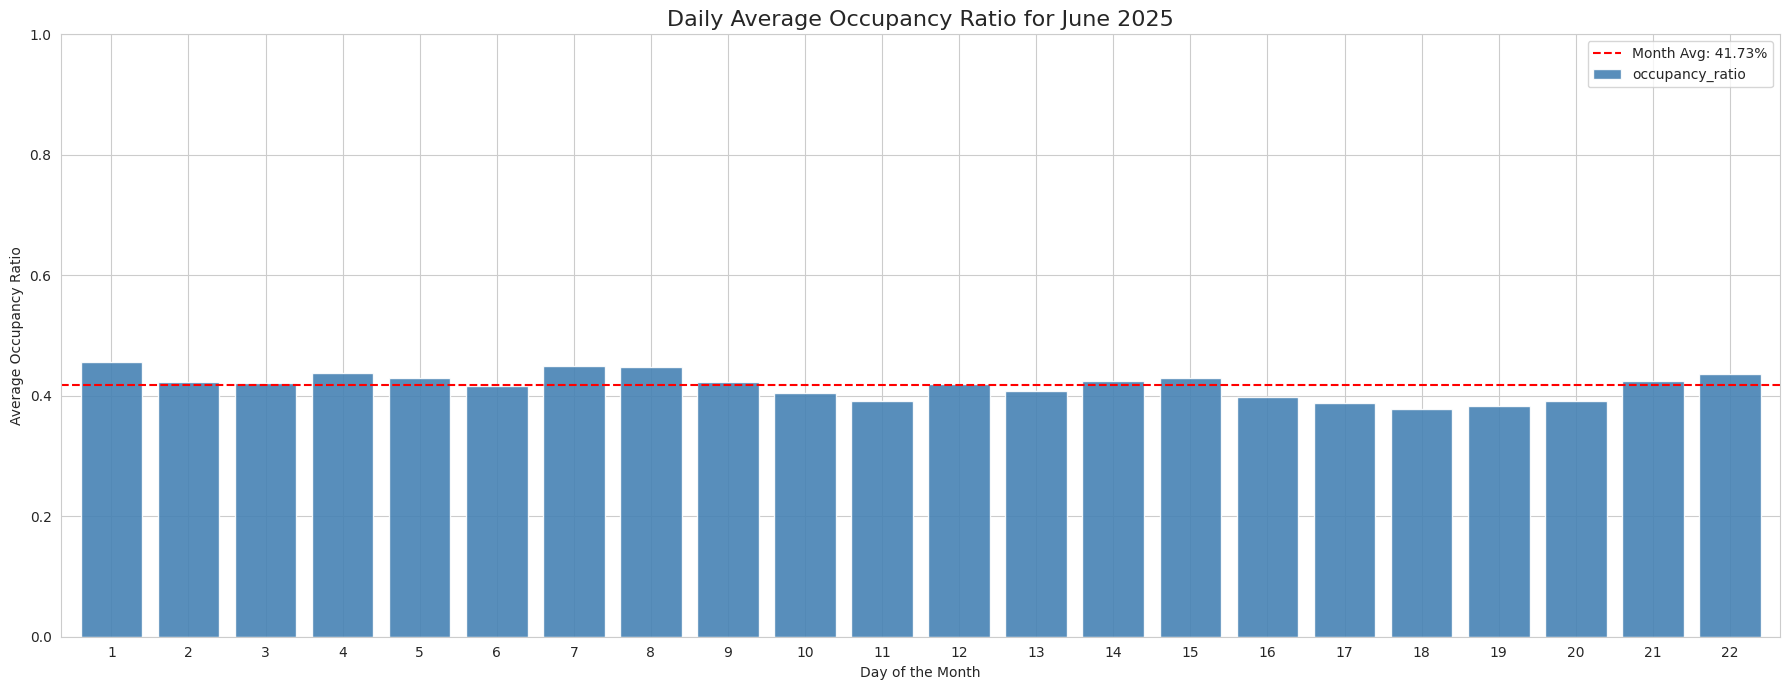


✅ All monthly plots have been generated.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

print("--- Generating Individual Monthly Occupancy Plots ---")

# --- Setup: Ensure data is ready ---
# Assuming df_features is loaded and 'time' is a datetime object
if 'time' not in df_features.columns:
    df_features.reset_index(inplace=True) # Ensure 'time' is a column
df_features['time'] = pd.to_datetime(df_features['time'])
sns.set_style("whitegrid")

# --- Get a list of unique months in the dataset ---
df_features['year_month'] = df_features['time'].dt.to_period('M')
unique_months = sorted(df_features['year_month'].unique())

# --- Loop through each month and create a plot ---
for month_period in unique_months:
    year = month_period.year
    month = month_period.month
    month_name = calendar.month_name[month]

    # Filter data for the specific month
    month_data = df_features[df_features['year_month'] == month_period]

    if month_data.empty:
        continue

    # Calculate the AVERAGE occupancy ratio for each DAY
    daily_avg_occupancy = month_data[month_data['act'] == 1].groupby(month_data['time'].dt.date)['occupancy_ratio'].mean()
    daily_avg_occupancy.index = pd.to_datetime(daily_avg_occupancy.index) # Convert index to datetime for plotting

    # --- Plotting ---
    plt.figure(figsize=(18, 7))
    ax = daily_avg_occupancy.plot(kind='bar', color='steelblue', width=0.8, alpha=0.9)
    plt.title(f'Daily Average Occupancy Ratio for {month_name} {year}', fontsize=16)
    plt.xlabel('Day of the Month')
    plt.ylabel('Average Occupancy Ratio')
    plt.ylim(0, 1)

    # Format x-axis to show only the day number
    ax.set_xticklabels([d.day for d in daily_avg_occupancy.index], rotation=0)

    # Add a horizontal line for the month's average to easily spot deviations
    month_avg = daily_avg_occupancy.mean()
    plt.axhline(y=month_avg, color='r', linestyle='--', label=f'Month Avg: {month_avg:.2%}')

    plt.legend()
    plt.tight_layout()
    plt.show()

# Clean up the helper column
df_features.drop(columns=['year_month'], inplace=True)

print("\n✅ All monthly plots have been generated.")

--- Analyzing Monthly Patterns ---


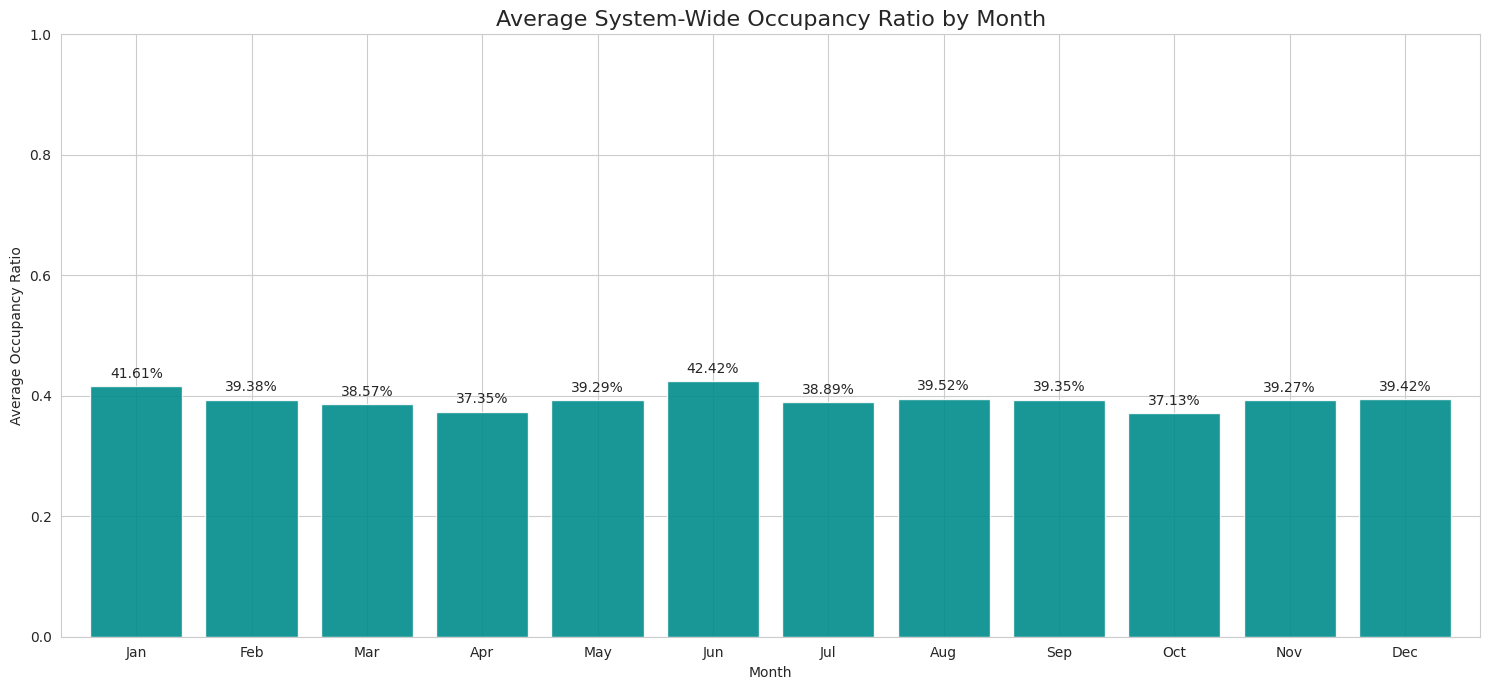

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

print("--- Analyzing Monthly Patterns ---")

# --- Setup: Ensure data is ready ---
# Assuming df_features is loaded and 'time' is a datetime object
if 'time' not in df_features.columns:
    df_features.reset_index(inplace=True) # Ensure 'time' is a column
df_features['time'] = pd.to_datetime(df_features['time'])
sns.set_style("whitegrid")

# --- Calculate Average Occupancy per Month ---
# Create a 'month' column to group by
df_features['month'] = df_features['time'].dt.month

# Group by month and calculate the mean of the occupancy ratio for active records
avg_occ_by_month = df_features[df_features['act'] == 1].groupby('month')['occupancy_ratio'].mean()

# Use calendar to get month names for better labels
avg_occ_by_month.index = avg_occ_by_month.index.map(lambda x: calendar.month_abbr[x])


# --- Plotting the Monthly Pattern ---
plt.figure(figsize=(15, 7))
ax = avg_occ_by_month.plot(kind='bar', color='darkcyan', width=0.8, alpha=0.9)
plt.title('Average System-Wide Occupancy Ratio by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Occupancy Ratio')
plt.ylim(0, 1) # Set y-axis from 0 to 1
plt.xticks(rotation=0)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.tight_layout()
plt.show()

# Clean up the helper column
df_features.drop(columns=['month'], inplace=True)

--- Analyzing Monthly Occupancy Patterns by District ---
Aggregating data to get average monthly occupancy for each district...

Found 13 unique districts. Generating plots...


/tmp/ipython-input-2084883034.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([calendar.month_abbr[m] for m in district_data['month']], rotation=0)


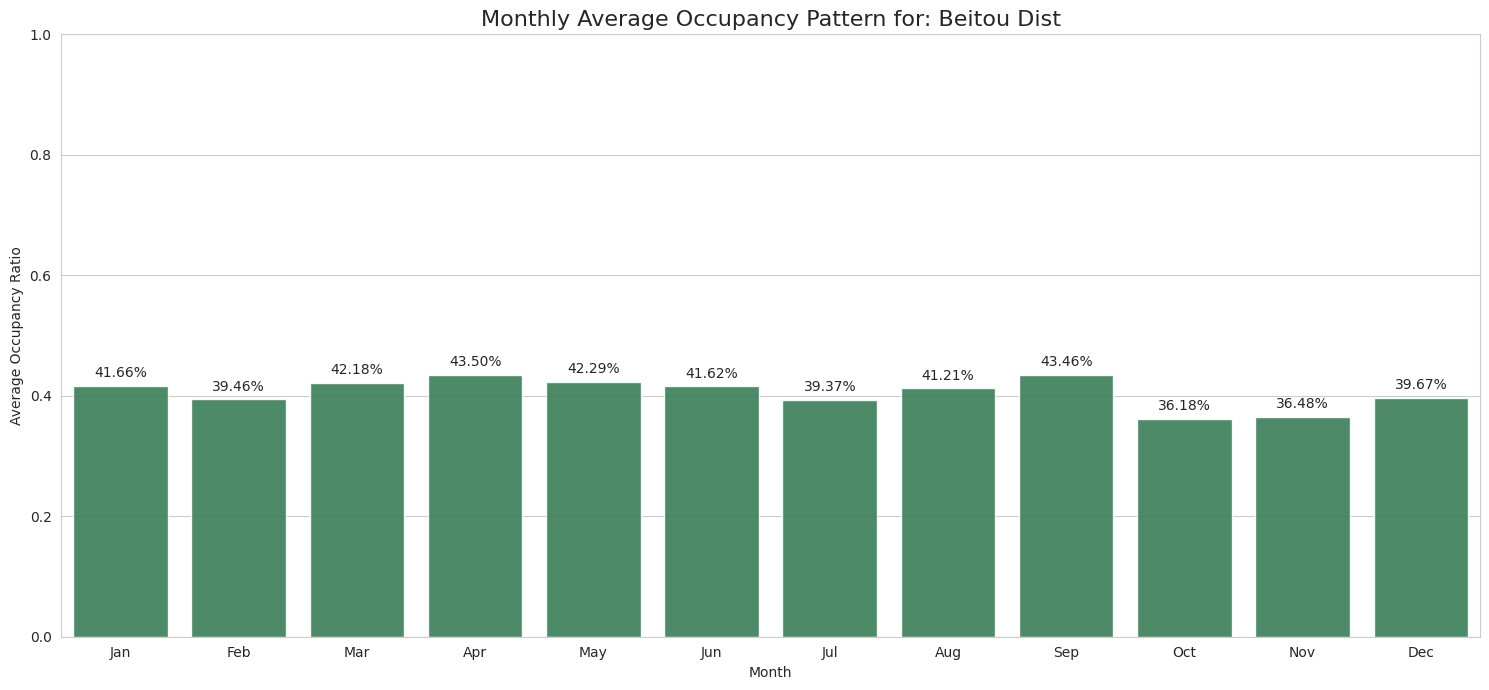

/tmp/ipython-input-2084883034.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([calendar.month_abbr[m] for m in district_data['month']], rotation=0)


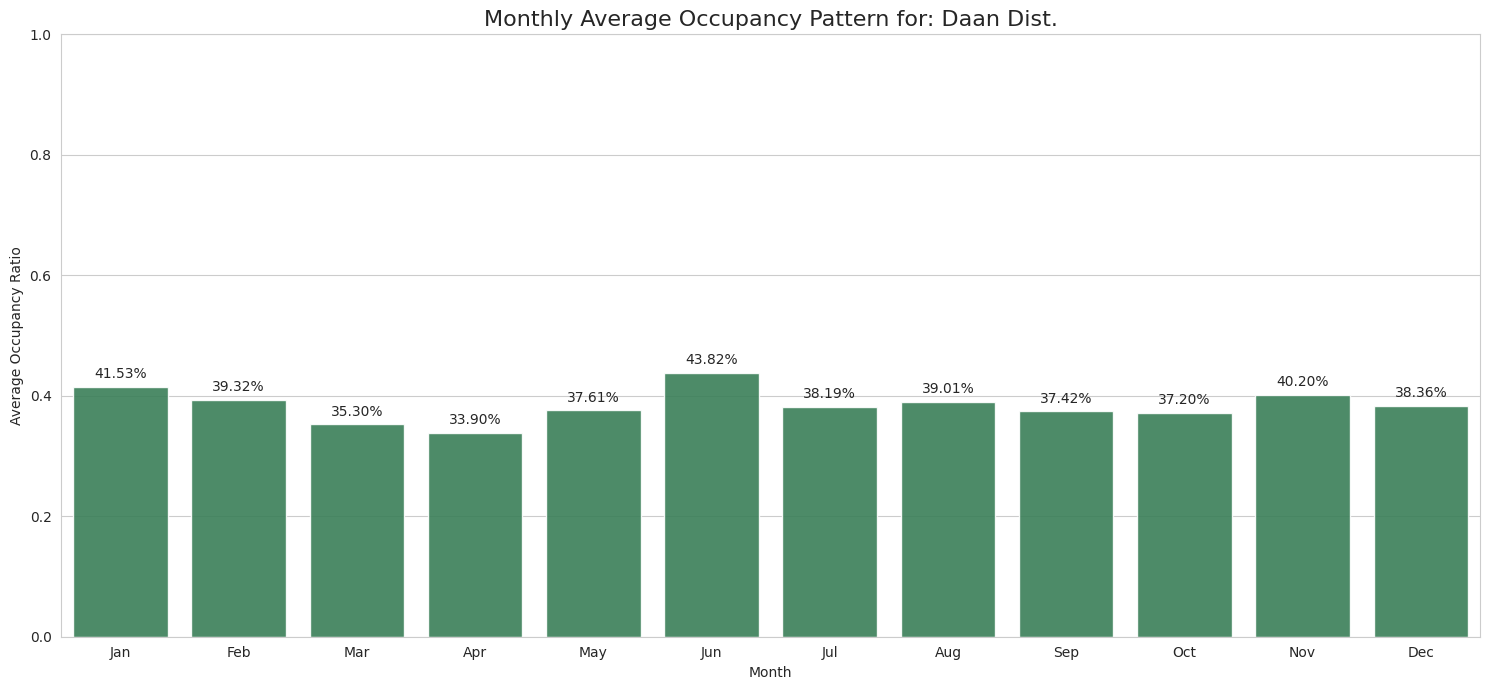

/tmp/ipython-input-2084883034.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([calendar.month_abbr[m] for m in district_data['month']], rotation=0)


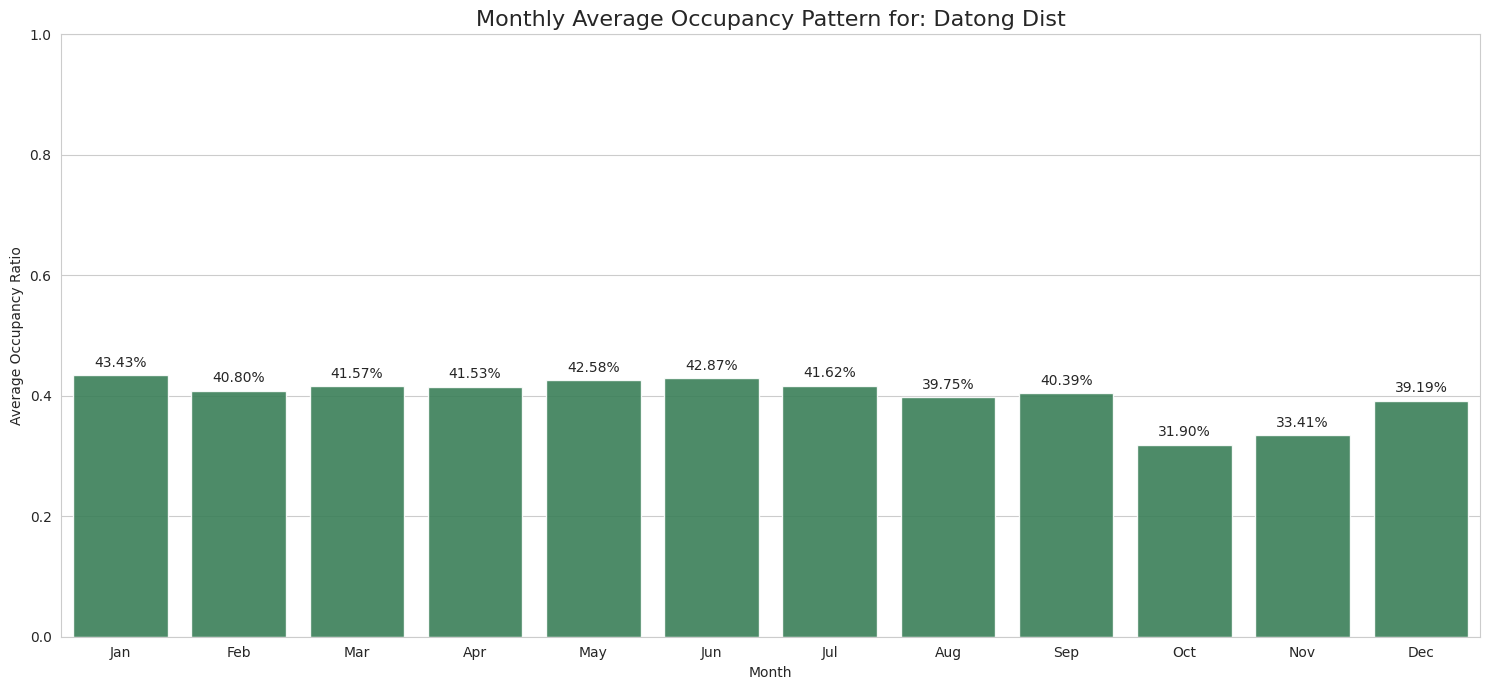

/tmp/ipython-input-2084883034.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([calendar.month_abbr[m] for m in district_data['month']], rotation=0)


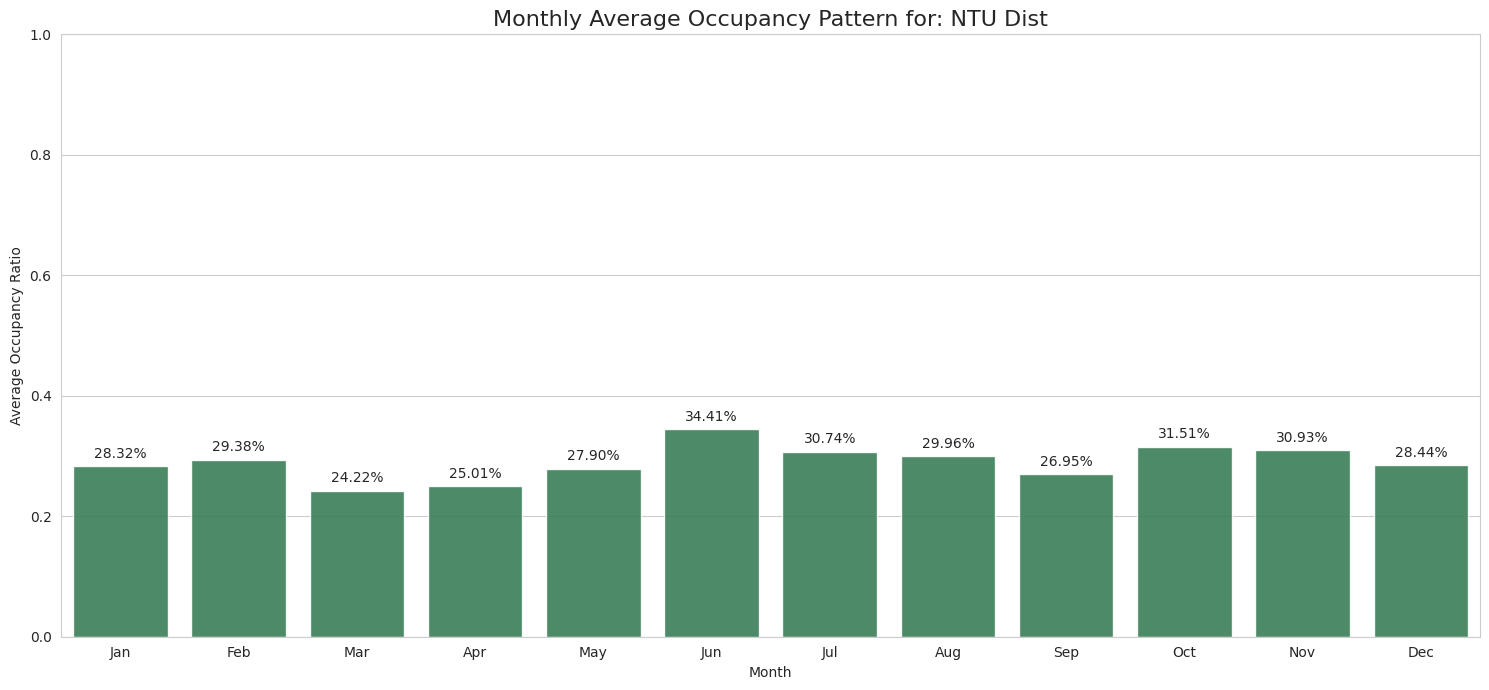

/tmp/ipython-input-2084883034.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([calendar.month_abbr[m] for m in district_data['month']], rotation=0)


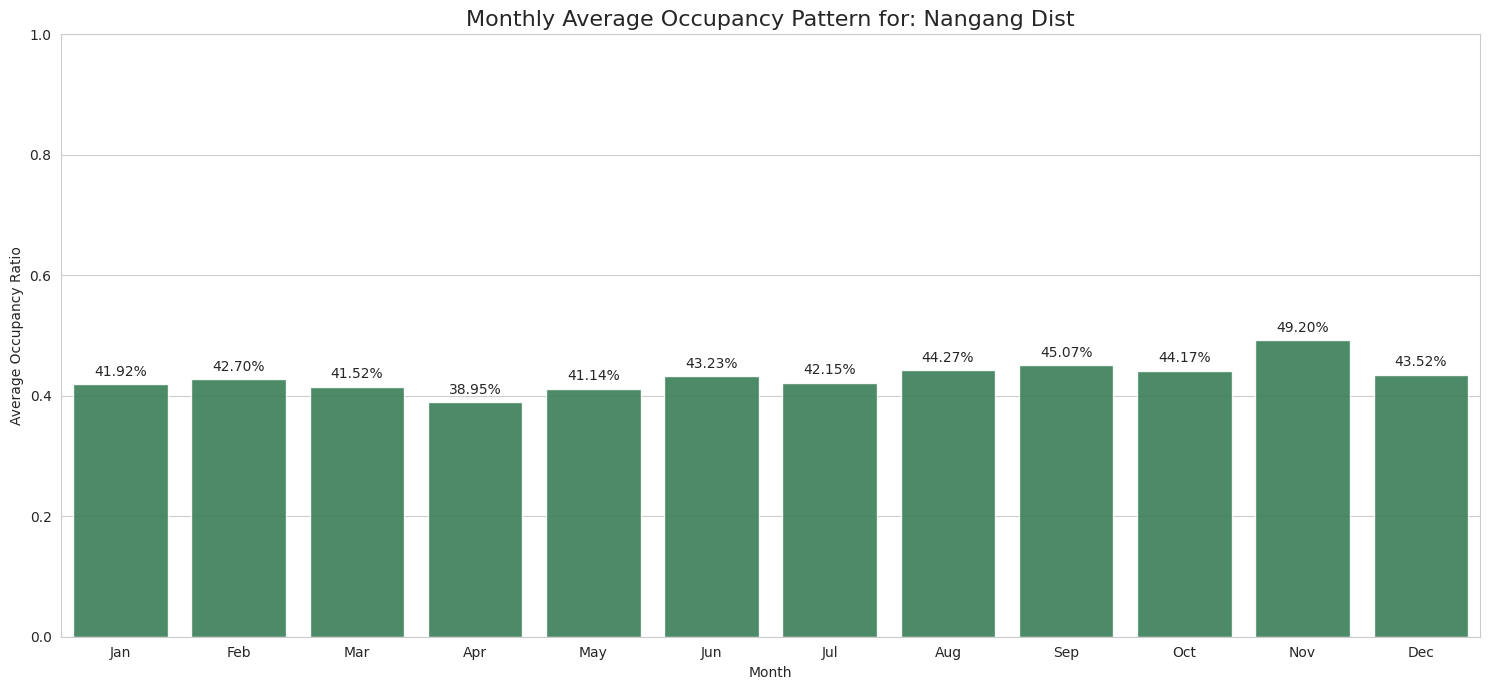

/tmp/ipython-input-2084883034.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([calendar.month_abbr[m] for m in district_data['month']], rotation=0)


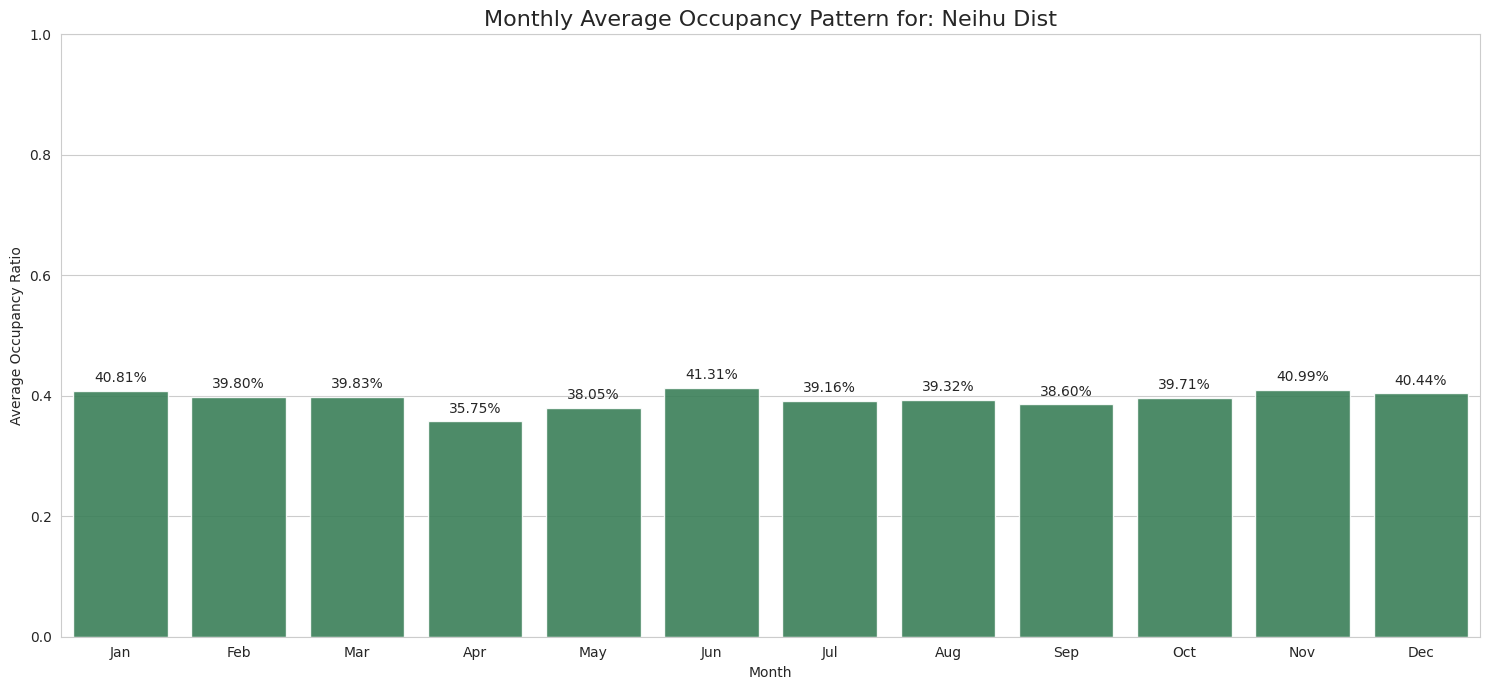

/tmp/ipython-input-2084883034.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([calendar.month_abbr[m] for m in district_data['month']], rotation=0)


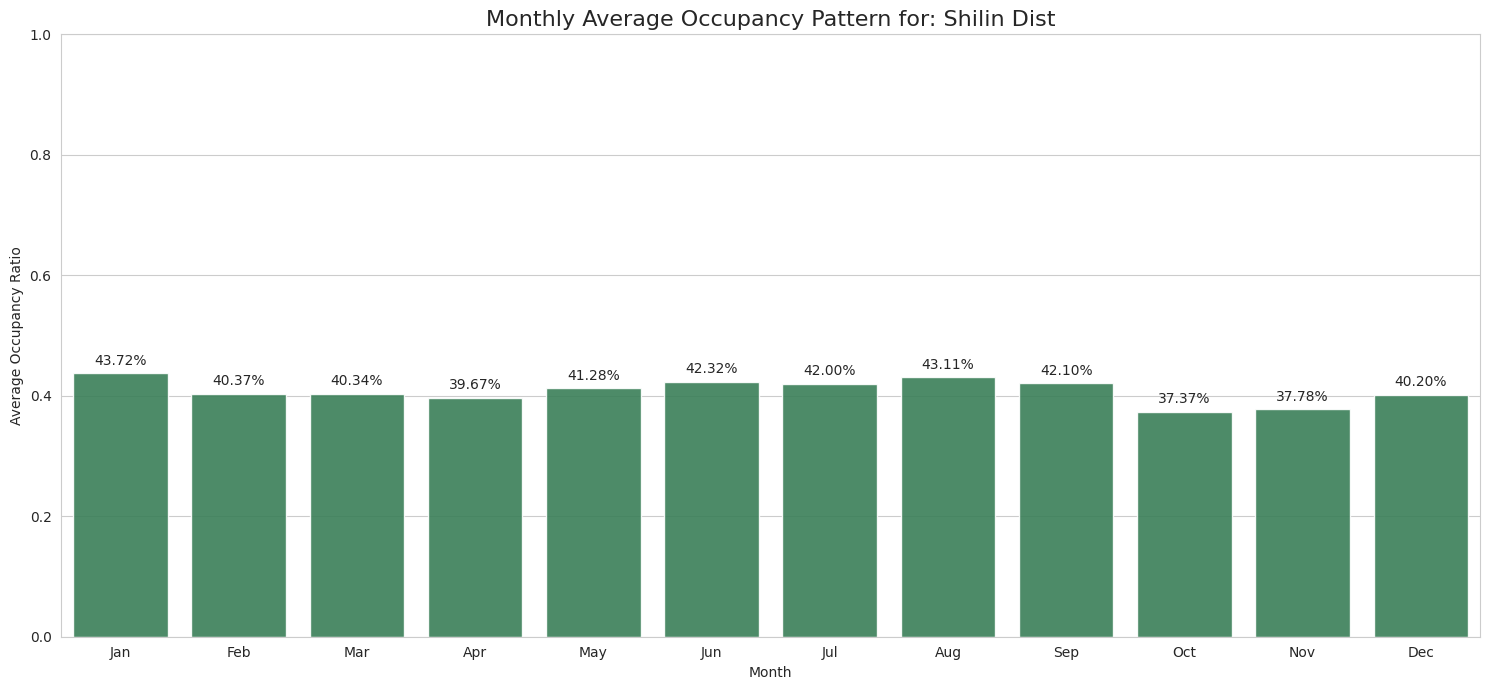

/tmp/ipython-input-2084883034.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([calendar.month_abbr[m] for m in district_data['month']], rotation=0)


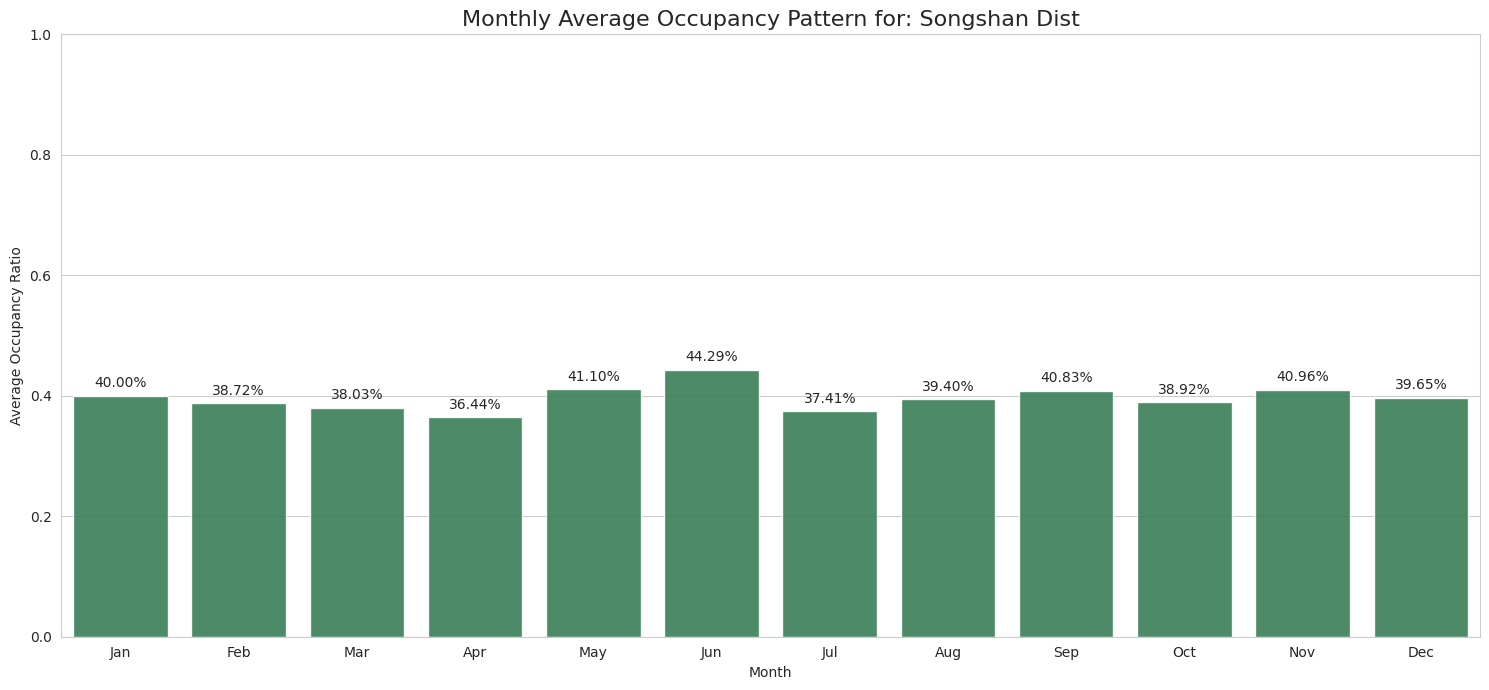

/tmp/ipython-input-2084883034.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([calendar.month_abbr[m] for m in district_data['month']], rotation=0)


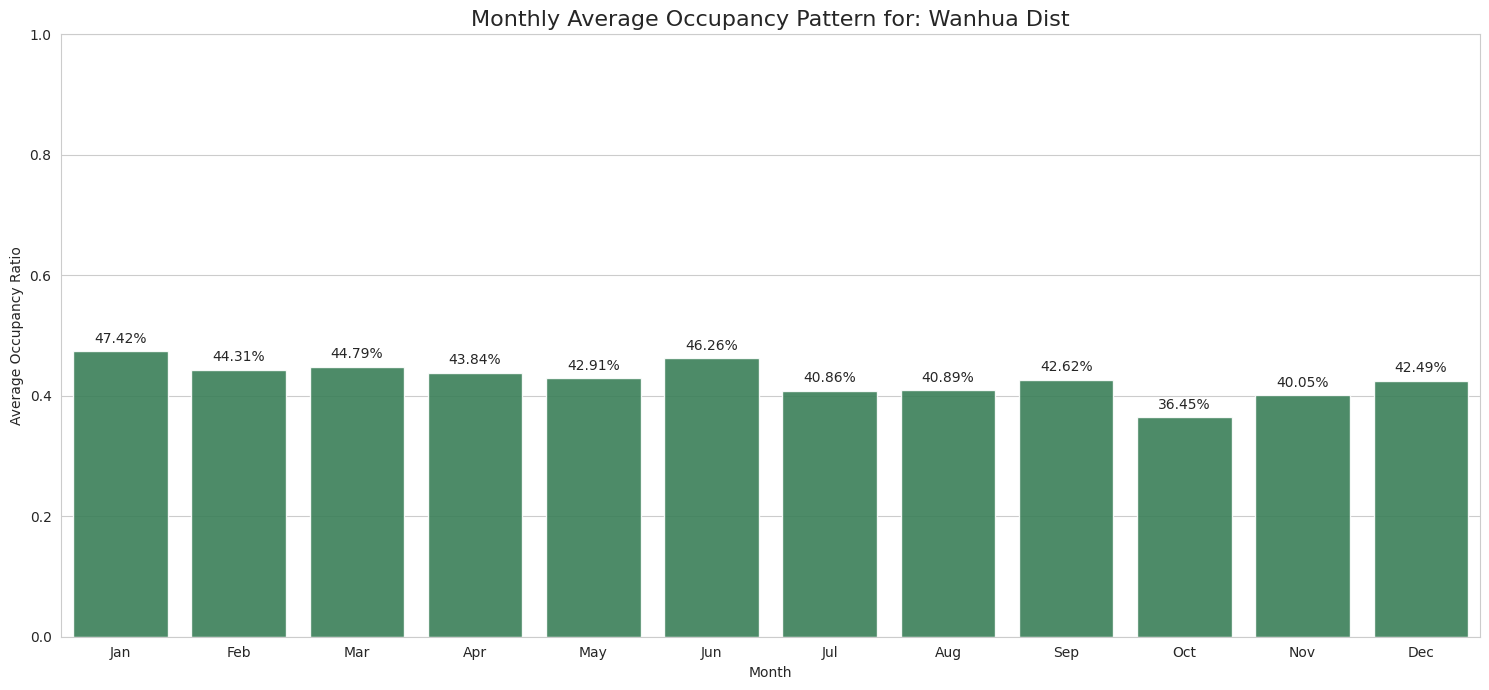

/tmp/ipython-input-2084883034.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([calendar.month_abbr[m] for m in district_data['month']], rotation=0)


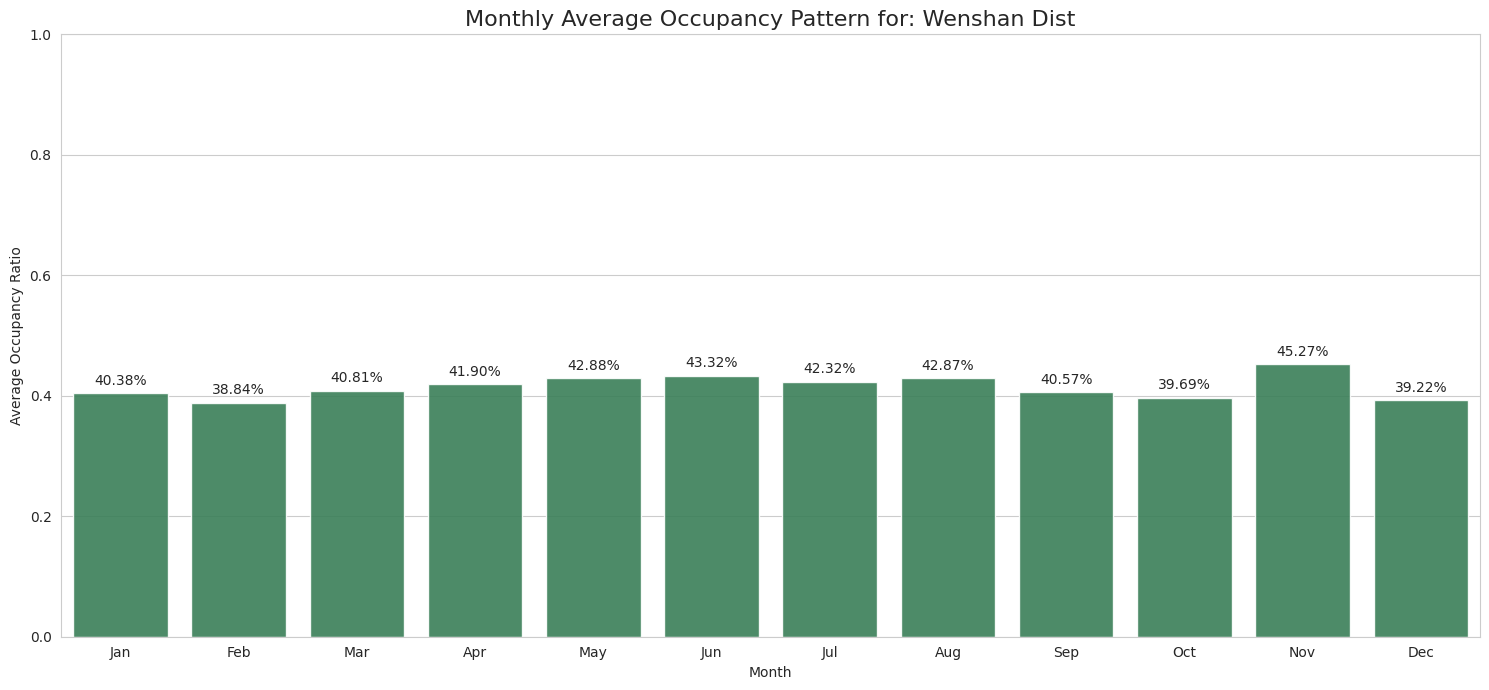

/tmp/ipython-input-2084883034.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([calendar.month_abbr[m] for m in district_data['month']], rotation=0)


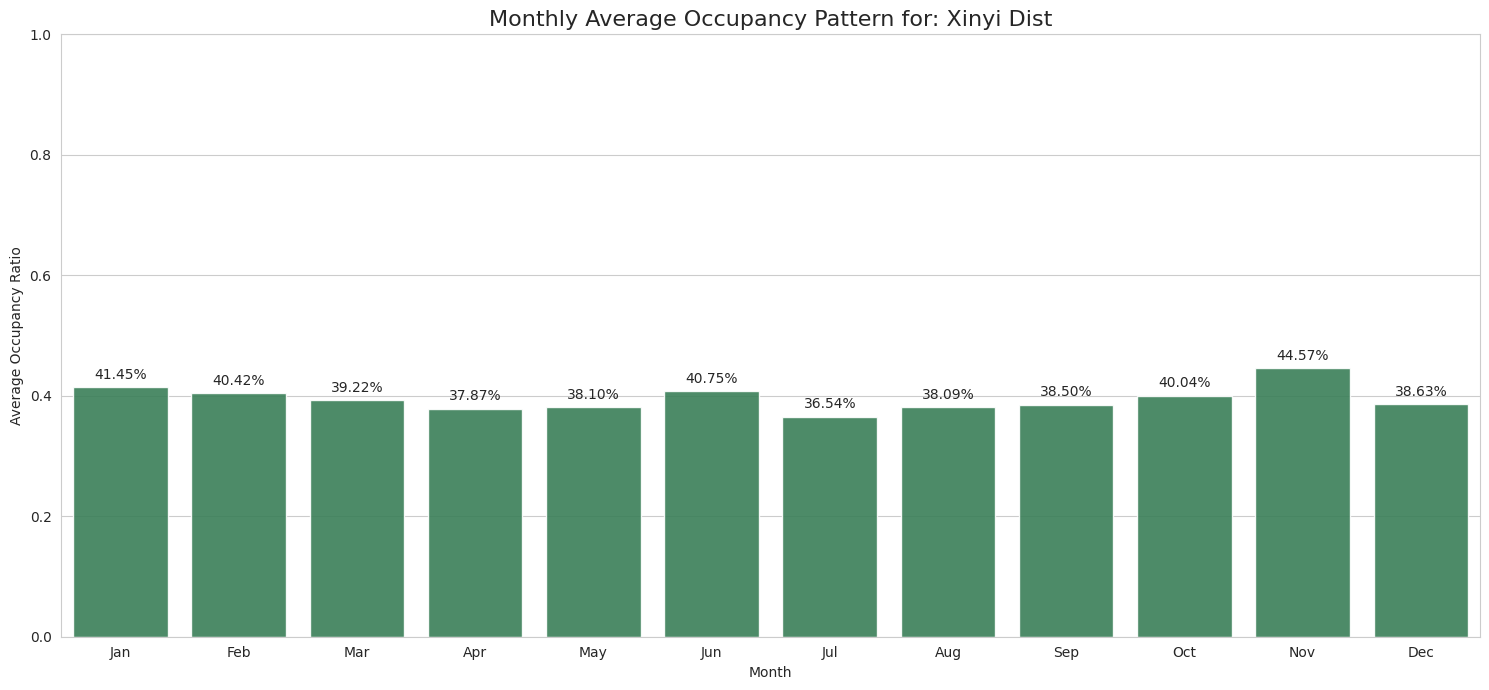

/tmp/ipython-input-2084883034.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([calendar.month_abbr[m] for m in district_data['month']], rotation=0)


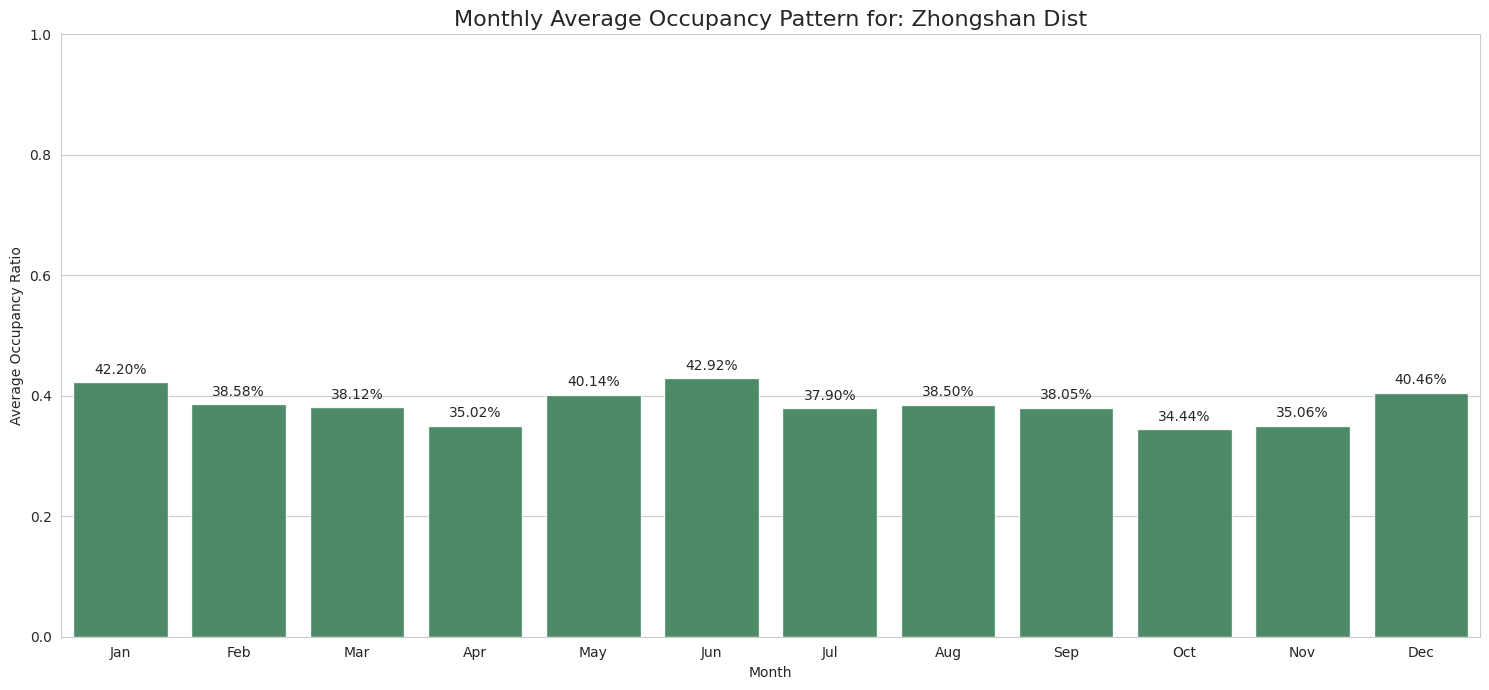

/tmp/ipython-input-2084883034.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([calendar.month_abbr[m] for m in district_data['month']], rotation=0)


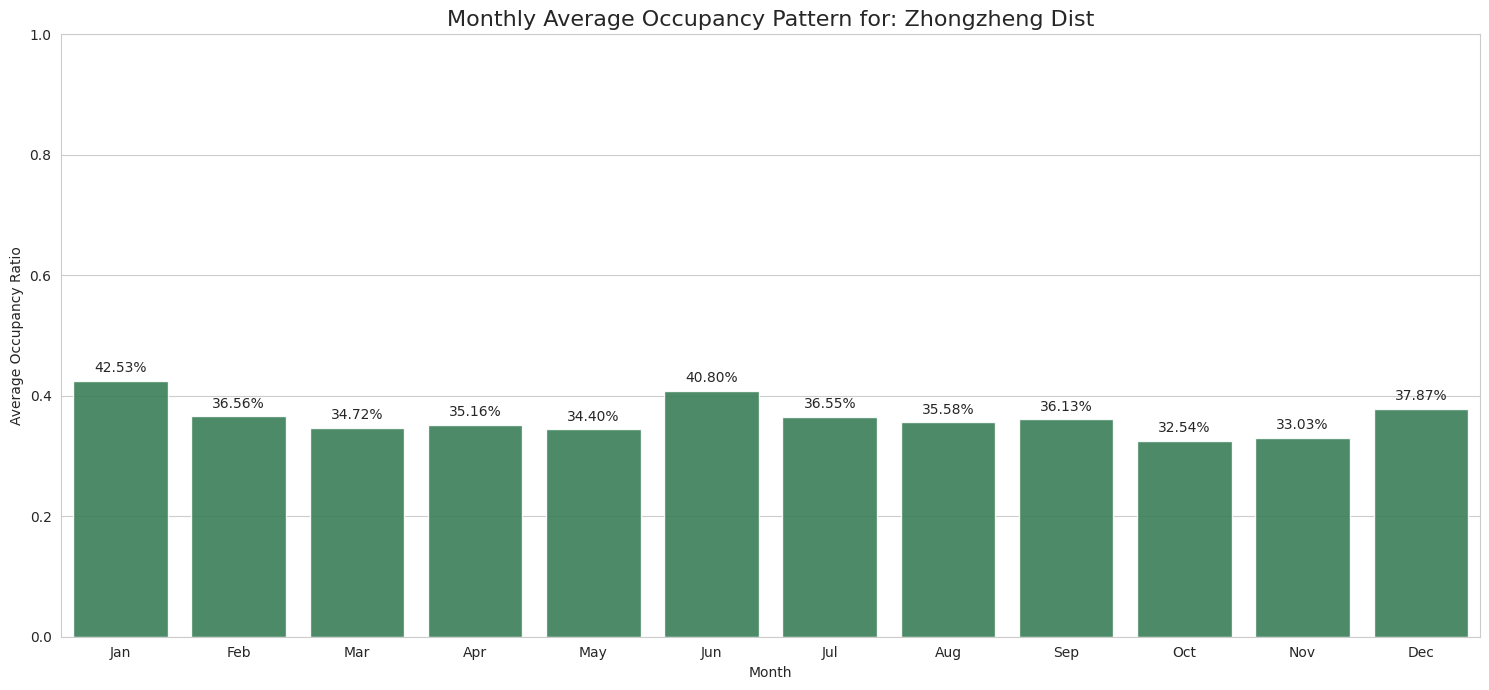


✅ All district-level monthly plots have been generated.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

print("--- Analyzing Monthly Occupancy Patterns by District ---")

# --- 1. Load and Prepare Data ---
# Assuming df_features is loaded. If not, load it with necessary columns.
# df_features = pd.read_parquet(ubike_path, columns=['time', 'act', 'occupancy_ratio', 'sareaen'])
df_features['time'] = pd.to_datetime(df_features['time'])

# ⚠️ IMPORTANT: Replace 'sareaen' with the actual name of your district column if different.
DISTRICT_COL = 'sareaen'
sns.set_style("whitegrid")


# --- 2. Aggregate Data by District and Month ---
print("Aggregating data to get average monthly occupancy for each district...")
# Create a 'month' column for grouping
df_features['month'] = df_features['time'].dt.month

# Group by district and month, then calculate the mean occupancy for active records
monthly_district_avg = df_features[df_features['act'] == 1].groupby([DISTRICT_COL, 'month'])['occupancy_ratio'].mean()

# Convert the result to a DataFrame for easier plotting
monthly_district_avg = monthly_district_avg.reset_index()


# --- 3. Loop Through Each District and Plot ---
# Get a list of unique districts to iterate over
unique_districts = monthly_district_avg[DISTRICT_COL].unique()
print(f"\nFound {len(unique_districts)} unique districts. Generating plots...")

for district in unique_districts:
    # Filter the data for the current district
    district_data = monthly_district_avg[monthly_district_avg[DISTRICT_COL] == district]

    # --- Plotting ---
    plt.figure(figsize=(15, 7))

    # Create a bar plot
    ax = sns.barplot(x='month', y='occupancy_ratio', data=district_data, color='seagreen', alpha=0.9)

    plt.title(f'Monthly Average Occupancy Pattern for: {district}', fontsize=16)
    plt.xlabel('Month')
    plt.ylabel('Average Occupancy Ratio')
    plt.ylim(0, 1) # Keep the y-axis consistent for comparison

    # Set month names as x-tick labels
    ax.set_xticklabels([calendar.month_abbr[m] for m in district_data['month']], rotation=0)

    # Add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Clean up the helper column from the main DataFrame
df_features.drop(columns=['month'], inplace=True)

print("\n✅ All district-level monthly plots have been generated.")

In [ ]:
import pandas as pd
import plotly.express as px

print("--- Visualizing All YouBike Stations (Color-Coded by District) ---")

# --- 1. Load Station Location and District Data (Memory-Safe) ---
# Define the path to your main Ubike data file
ubike_path = "/content/drive/MyDrive/Youbike_Master_Project/YouBike_Demand_Forecast/data/ubike_final_data_with_ratio.parquet.gz"

# ⚠️ IMPORTANT: Replace 'sareaen' with the actual name of your district column if different.
DISTRICT_COL = 'sareaen'

# Load only the columns needed for the map
cols_to_load = ['sno', 'lat', 'lng', DISTRICT_COL]
print(f"Selectively loading {len(cols_to_load)} columns from the full dataset...")
df_all_locations = pd.read_parquet(ubike_path, columns=cols_to_load)

# Create a small DataFrame with only the unique stations
unique_stations = df_all_locations.drop_duplicates(subset=['sno']).copy()
print(f"✅ Found {len(unique_stations)} unique stations.")


# --- 2. Generate the Map Visualization ---
print("\nGenerating map visualization...")
fig = px.scatter_mapbox(
    unique_stations,
    lat="lat",
    lon="lng",
    color=DISTRICT_COL,  # <-- THIS IS THE KEY CHANGE
    zoom=11,
    mapbox_style="carto-positron",
    title="Map of All YouBike Stations in Taipei (by District)",
    hover_name="sno",
    hover_data={DISTRICT_COL: True} # Show district name on hover
)

# Adjust marker size for better visibility
fig.update_traces(marker={'size': 5, 'opacity': 0.8})

fig.show()

--- Visualizing All YouBike Stations (Color-Coded by District) ---
Selectively loading 4 columns from the full dataset...
✅ Found 1246 unique stations.

Generating map visualization...


In [ ]:
import pandas as pd
import plotly.express as px

print("--- Visualizing YouBike Station Locations in Daan District ---")

# --- 1. Load Necessary Location Data (Memory-Safe) ---
# Define the path to your main Ubike data file
ubike_path = "/content/drive/MyDrive/Youbike_Master_Project/YouBike_Demand_Forecast/data/ubike_final_data_with_ratio.parquet.gz"

# ⚠️ IMPORTANT: Replace 'sareaen' with the actual name of your district column if different.
DISTRICT_COL = 'sareaen'

# Load only the columns needed for this map
cols_to_load = ['sno', 'lat', 'lng', DISTRICT_COL]
print(f"Selectively loading {len(cols_to_load)} columns...")
df_locations = pd.read_parquet(ubike_path, columns=cols_to_load)

# Get unique station locations to avoid plotting the same station multiple times
df_locations.drop_duplicates(subset=['sno'], inplace=True)
print("✅ Location data loaded.")


# --- 2. Filter for Daan District ---
# Make sure to use the exact name of the district as it appears in your data
daan_stations = df_locations[df_locations[DISTRICT_COL] == 'Daan Dist.'].copy()
print(f"Found {len(daan_stations)} unique stations in Daan District.")


# --- 3. Generate the Map Visualization ---
print("\nGenerating map visualization...")
fig = px.scatter_mapbox(
    daan_stations,
    lat="lat",
    lon="lng",
    zoom=13,  # Zoom in a bit closer for a single district
    mapbox_style="carto-positron",
    title="YouBike Station Locations in Daan District",
    hover_name="sno" # Show the station ID when you hover over a point
)

# Make the markers a bit larger and of a uniform color for better visibility
fig.update_traces(marker={'size': 10, 'color': 'blue'})

fig.show()

--- Visualizing YouBike Station Locations in Daan District ---
Selectively loading 4 columns...
✅ Location data loaded.
Found 170 unique stations in Daan District.

Generating map visualization...


In [ ]:
import pandas as pd
import plotly.express as px

print("--- Visualizing YouBike Station Locations in NTU District ---")

# --- 1. Load Necessary Location Data (Memory-Safe) ---
# Define the path to your main Ubike data file
ubike_path = "/content/drive/MyDrive/Youbike_Master_Project/YouBike_Demand_Forecast/data/ubike_final_data_with_ratio.parquet.gz"

# ⚠️ IMPORTANT: Replace 'sareaen' with the actual name of your district column if different.
DISTRICT_COL = 'sareaen'

# Load only the columns needed for this map
cols_to_load = ['sno', 'lat', 'lng', DISTRICT_COL]
print(f"Selectively loading {len(cols_to_load)} columns...")
df_locations = pd.read_parquet(ubike_path, columns=cols_to_load)

# Get unique station locations to avoid plotting the same station multiple times
df_locations.drop_duplicates(subset=['sno'], inplace=True)
print("✅ Location data loaded.")


# --- 2. Filter for NTU District ---
# This is the only line changed from the previous script
ntu_stations = df_locations[df_locations[DISTRICT_COL] == 'NTU Dist'].copy()
print(f"Found {len(ntu_stations)} unique stations in NTU District.")


# --- 3. Generate the Map Visualization ---
print("\nGenerating map visualization...")
fig = px.scatter_mapbox(
    ntu_stations,
    lat="lat",
    lon="lng",
    zoom=14,  # Zoom in even closer for a campus-sized area
    mapbox_style="carto-positron",
    title="YouBike Station Locations in NTU District",
    hover_name="sno" # Show the station ID when you hover over a point
)

# Make the markers a bit larger and of a uniform color for better visibility
fig.update_traces(marker={'size': 10, 'color': 'green'})

fig.show()

--- Visualizing YouBike Station Locations in NTU District ---
Selectively loading 4 columns...
✅ Location data loaded.
Found 46 unique stations in NTU District.

Generating map visualization...


In [ ]:
import pandas as pd
import plotly.express as px

print("--- Visualizing YouBike Station Locations in Gongguan ---")

# --- 1. Load Station Location Data (Memory-Safe) ---
# Define the path to your main Ubike data file
ubike_path = "/content/drive/MyDrive/Youbike_Master_Project/YouBike_Demand_Forecast/data/ubike_final_data_with_ratio.parquet.gz"

# Load only the columns needed to identify and locate stations
cols_to_load = ['sno', 'lat', 'lng']
print(f"Selectively loading {len(cols_to_load)} columns...")
df_locations = pd.read_parquet(ubike_path, columns=cols_to_load)

# Get unique station locations
df_locations.drop_duplicates(subset=['sno'], inplace=True)
print("✅ Location data loaded.")


# --- 2. Filter for Gongguan Area using a Bounding Box ---
# These are the approximate coordinates for the Gongguan area
GONGGUAN_LAT_MIN, GONGGUAN_LAT_MAX = 25.005, 25.025
GONGGUAN_LON_MIN, GONGGUAN_LON_MAX = 121.525, 121.545

gongguan_stations = df_locations[
    (df_locations['lat'] >= GONGGUAN_LAT_MIN) &
    (df_locations['lat'] <= GONGGUAN_LAT_MAX) &
    (df_locations['lng'] >= GONGGUAN_LON_MIN) &
    (df_locations['lng'] <= GONGGUAN_LON_MAX)
].copy()

print(f"Found {len(gongguan_stations)} unique stations in the Gongguan area.")


# --- 3. Generate the Map Visualization ---
print("\nGenerating map visualization...")
fig = px.scatter_mapbox(
    gongguan_stations,
    lat="lat",
    lon="lng",
    zoom=14,  # Zoomed in for a neighborhood view
    mapbox_style="carto-positron",
    title="YouBike Station Locations in Gongguan",
    hover_name="sno" # Show the station ID when you hover over a point
)

# Make the markers a bit larger and of a uniform color for better visibility
fig.update_traces(marker={'size': 10, 'color': 'purple'})

fig.show()

--- Visualizing YouBike Station Locations in Gongguan ---
Selectively loading 3 columns...
✅ Location data loaded.
Found 105 unique stations in the Gongguan area.

Generating map visualization...


# Weather


Loading weather data from: /content/drive/MyDrive/Youbike_Master_Project/YouBike_Demand_Forecast/data/taipei_songshan_weather.parquet.gz

--- Initial Data Head ---
             Timestamp  Temperature  Dew Point  Humidity Wind  Speed  \
0  2024-05-03 02:00:00           68         64        88    E     13   
1  2024-05-03 03:00:00           68         64        88    E      9   
2  2024-05-03 04:00:00           70         64        83    E     12   
3  2024-05-03 05:00:00           70         64        83    E     12   
4  2024-05-03 06:00:00           68         64        88    E      9   

   Wind Gust  Pressure  Precip.      Condition  
0        NaN     29.93      NaN  Mostly Cloudy  
1        NaN     29.93      NaN  Mostly Cloudy  
2        NaN     29.93      NaN  Mostly Cloudy  
3        NaN     29.93      NaN  Mostly Cloudy  
4        NaN     29.93      NaN  Mostly Cloudy  

--- Data Info (Types and Nulls) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19799 entries, 0 to 19

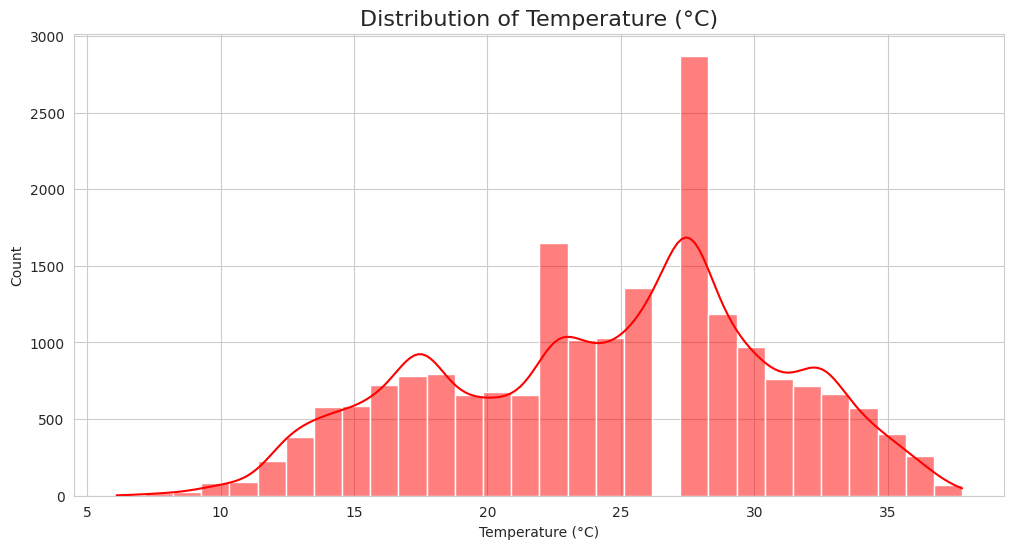

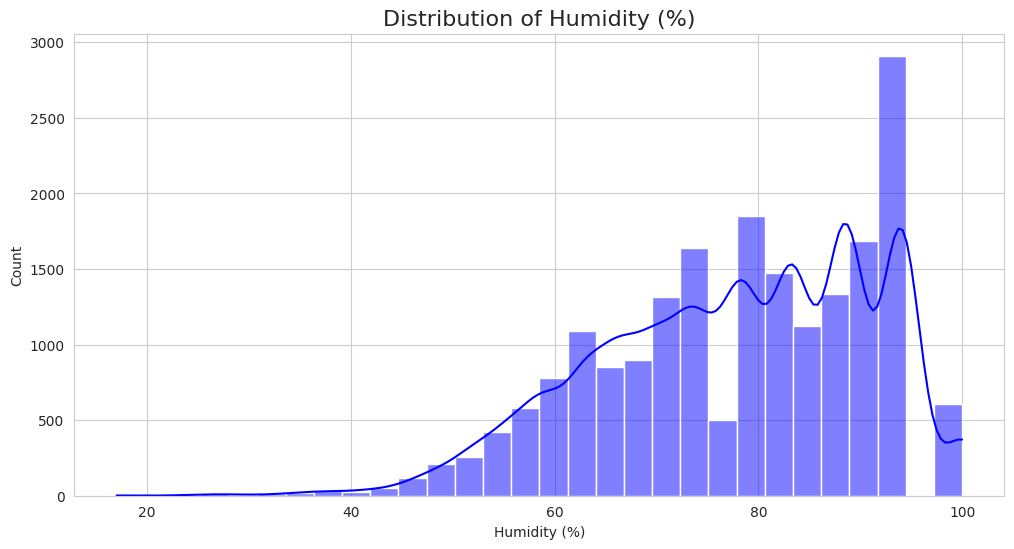

/tmp/ipython-input-460630892.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_weather['Wind'], order=df_weather['Wind'].value_counts().index, palette='viridis')


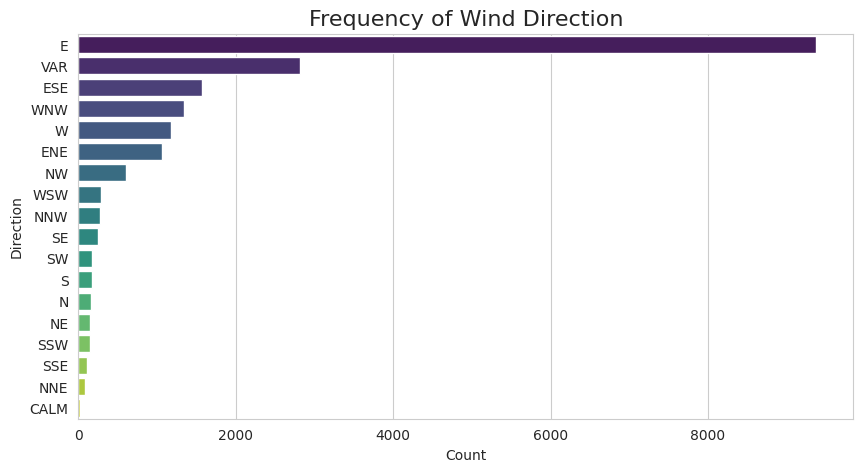

/tmp/ipython-input-460630892.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_weather['Condition'], order=df_weather['Condition'].value_counts().index, palette='plasma')


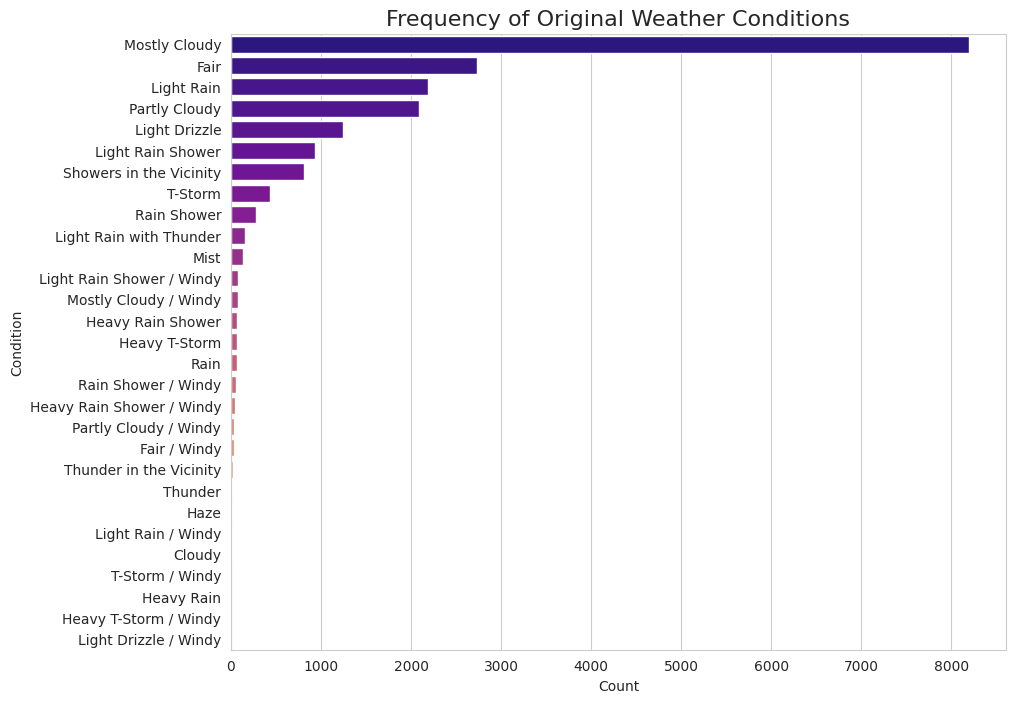


--- Time Series Analysis ---


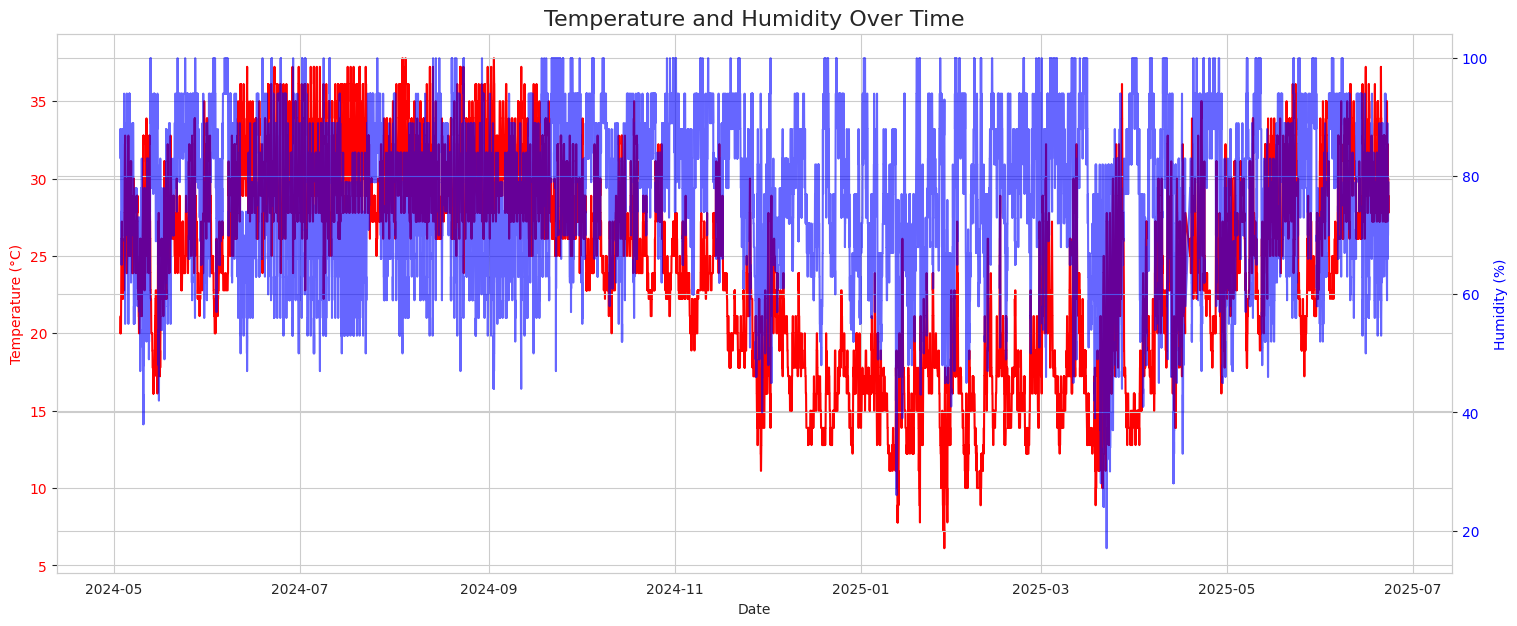

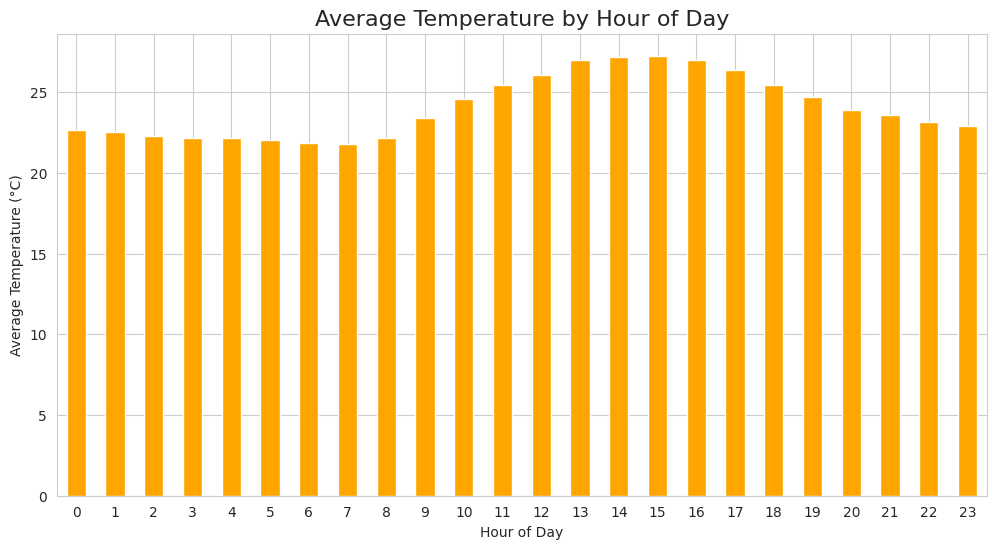

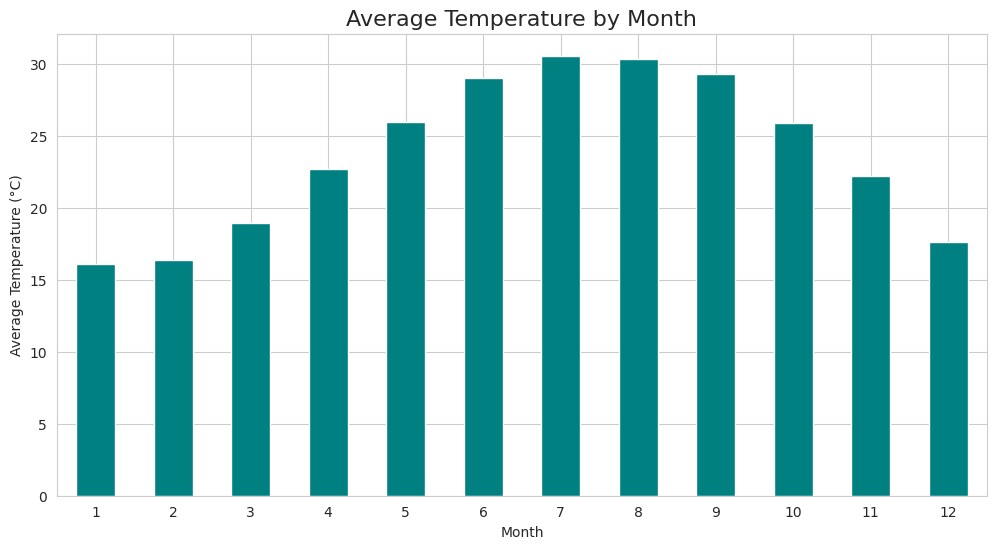


--- Bivariate Analysis ---


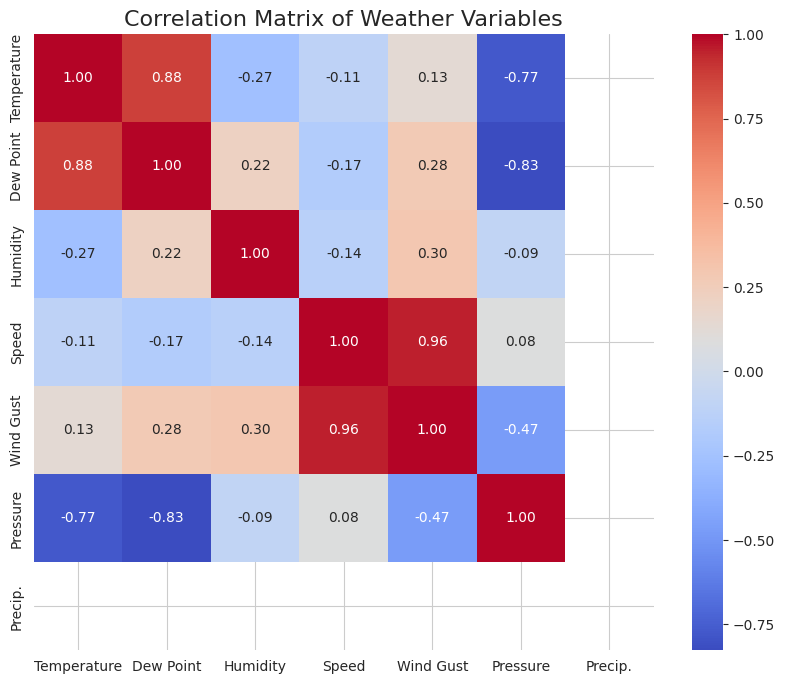


✅ Weather data EDA complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Load and Initial Inspection ---
file_path = "/content/drive/MyDrive/Youbike_Master_Project/YouBike_Demand_Forecast/data/taipei_songshan_weather.parquet.gz"
print(f"Loading weather data from: {file_path}")
df_weather = pd.read_parquet(file_path)

print("\n--- Initial Data Head ---")
print(df_weather.head())

print("\n--- Data Info (Types and Nulls) ---")
df_weather.info()

print("\n--- Summary Statistics (Raw Data) ---")
print(df_weather.describe())


# --- 2. Data Cleaning and Preparation ---
print("\n--- Cleaning and Preparing Data ---")
# Convert 'Timestamp' to datetime objects
df_weather['Timestamp'] = pd.to_datetime(df_weather['Timestamp'])

# Convert Fahrenheit columns to Celsius for better interpretability
# Formula: C = (F - 32) * 5/9
print("Converting Temperature and Dew Point from Fahrenheit to Celsius...")
for col in ['Temperature', 'Dew Point']:
    df_weather[col] = (df_weather[col] - 32) * 5 / 9

# Handle the 'Condition' column - it's likely text. Let's see the unique values.
print("\nUnique weather conditions found:")
print(df_weather['Condition'].unique())

# Set Timestamp as index for time series analysis
df_weather.set_index('Timestamp', inplace=True)
print("\n✅ Data cleaning complete. 'Timestamp' is now the index.")


# --- 3. Univariate Analysis (Exploring Single Variables) ---
print("\n--- Univariate Analysis ---")
sns.set_style("whitegrid")

# Distribution of Temperature
plt.figure(figsize=(12, 6))
sns.histplot(df_weather['Temperature'], bins=30, kde=True, color='red')
plt.title('Distribution of Temperature (°C)', fontsize=16)
plt.xlabel('Temperature (°C)')
plt.show()

# Distribution of Humidity
plt.figure(figsize=(12, 6))
sns.histplot(df_weather['Humidity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Humidity (%)', fontsize=16)
plt.xlabel('Humidity (%)')
plt.show()

# Frequency of Wind Direction
plt.figure(figsize=(10, 5))
sns.countplot(y=df_weather['Wind'], order=df_weather['Wind'].value_counts().index, palette='viridis')
plt.title('Frequency of Wind Direction', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Direction')
plt.show()

# Frequency of Original Weather Conditions
plt.figure(figsize=(10, 8))
sns.countplot(y=df_weather['Condition'], order=df_weather['Condition'].value_counts().index, palette='plasma')
plt.title('Frequency of Original Weather Conditions', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Condition')
plt.show()


# --- 4. Time Series Analysis (Patterns over Time) ---
print("\n--- Time Series Analysis ---")

# Plot Temperature and Humidity over the entire period
fig, ax1 = plt.subplots(figsize=(18, 7))
ax1.plot(df_weather.index, df_weather['Temperature'], color='red', label='Temperature (°C)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax2 = ax1.twinx()
ax2.plot(df_weather.index, df_weather['Humidity'], color='blue', alpha=0.6, label='Humidity (%)')
ax2.set_ylabel('Humidity (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
plt.title('Temperature and Humidity Over Time', fontsize=16)
plt.show()

# Average Temperature by Hour of Day (Diurnal Cycle)
plt.figure(figsize=(12, 6))
df_weather.groupby(df_weather.index.hour)['Temperature'].mean().plot(kind='bar', color='orange')
plt.title('Average Temperature by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

# Average Temperature by Month (Seasonal Cycle)
plt.figure(figsize=(12, 6))
df_weather.groupby(df_weather.index.month)['Temperature'].mean().plot(kind='bar', color='teal')
plt.title('Average Temperature by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=0)
plt.show()


# --- 5. Bivariate Analysis (Relationships between Variables) ---
print("\n--- Bivariate Analysis ---")

# Correlation Matrix Heatmap for numerical variables
numerical_cols = df_weather.select_dtypes(include=np.number)
corr_matrix = numerical_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Weather Variables', fontsize=16)
plt.show()

print("\n✅ Weather data EDA complete.")
# Reset index if you plan to merge this dataframe later
df_weather.reset_index(inplace=True)



#Special Days

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

print("--- Measuring the Impact of Holidays on Individual Stations (Memory-Safe) ---")

# --- 1. Load Data with Holiday Features ---
# Define paths
dl_features_path = "/content/drive/MyDrive/Youbike_Master_Project/YouBike_Demand_Forecast/data/model_ready_dl_features.parquet.gz"
original_ubike_path = "/content/drive/MyDrive/Youbike_Master_Project/YouBike_Demand_Forecast/data/ubike_final_data_with_ratio.parquet.gz" # For lat/lng

# Define the minimal columns needed from the large DL-ready file
cols_to_load = [
    'time', 'sno', 'occupancy_ratio',
    'day_is_Holiday', 'day_is_Weekday', 'day_is_Weekend'
]
print(f"Selectively loading {len(cols_to_load)} columns from the main feature file...")
df_features = pd.read_parquet(dl_features_path, columns=cols_to_load)
df_features['time'] = pd.to_datetime(df_features['time'])
print("✅ Main data loaded.")

# --- 2. Reconstruct the 'day_type' Column ---
# We recreate the categorical column from the one-hot encoded flags
print("Reconstructing 'day_type' column...")
conditions = [
    df_features['day_is_Holiday'] == True,
    df_features['day_is_Weekend'] == True
]
choices = ['Holiday', 'Weekend']
df_features['day_type'] = np.select(conditions, choices, default='Weekday')
print("✅ 'day_type' column reconstructed.")


# --- 3. Calculate "Normal" Behavior Profiles ---
print("Calculating normal behavior profiles for each station...")
df_features['hour'] = df_features['time'].dt.hour
df_features['day_of_week'] = df_features['time'].dt.dayofweek # Monday=0, Sunday=6
normal_days_df = df_features[df_features['day_type'].isin(['Weekday', 'Weekend'])]
normal_profiles = normal_days_df.groupby(['sno', 'day_of_week', 'hour'])['occupancy_ratio'].mean().reset_index()
normal_profiles.rename(columns={'occupancy_ratio': 'normal_occupancy'}, inplace=True)
print("✅ Normal profiles calculated.")


# --- 4. Isolate Holiday Behavior & Calculate Impact ---
print("\nComparing holiday behavior to normal behavior to calculate impact...")
holiday_df = df_features[df_features['day_type'] == 'Holiday'].copy()
holiday_df['date'] = holiday_df['time'].dt.date
impact_df = pd.merge(holiday_df, normal_profiles, on=['sno', 'day_of_week', 'hour'], how='left')
impact_df['impact_score'] = impact_df['occupancy_ratio'] - impact_df['normal_occupancy']
final_impact = impact_df.groupby(['sno', 'date'])['impact_score'].mean().reset_index()
print("✅ Impact scores calculated.")


# --- 5. Analyze and Visualize the Results ---
# Let's look at a specific holiday, for example, National Day (2024-10-10)
target_holiday_date = pd.to_datetime('2024-10-10').date()
holiday_impact = final_impact[final_impact['date'] == target_holiday_date].copy()

# Load station location data separately for context
print("\nLoading station location data for the map...")
station_locations = pd.read_parquet(original_ubike_path, columns=['sno', 'lat', 'lng']).drop_duplicates(subset=['sno'])
holiday_impact = pd.merge(holiday_impact, station_locations, on='sno', how='left')
holiday_impact.sort_values('impact_score', inplace=True)

print(f"\n--- Analysis for {target_holiday_date} ---")
print("\nTop 5 Stations MORE POPULAR than usual (Fuller):")
print(holiday_impact.tail(5))
print("\nTop 5 Stations LESS POPULAR than usual (Emptier):")
print(holiday_impact.head(5))

# --- 6. Visualize the Impact on a Map ---
print("\nGenerating map visualization...")
fig = px.scatter_mapbox(
    holiday_impact.dropna(subset=['lat', 'lng']), # Drop stations if location is missing
    lat="lat",
    lon="lng",
    color="impact_score",
    size=abs(holiday_impact["impact_score"]),
    color_continuous_scale=px.colors.diverging.RdBu_r, # Reversed so positive is blue
    size_max=15,
    zoom=11,
    mapbox_style="carto-positron",
    title=f"Holiday Impact on YouBike Stations ({target_holiday_date})",
    hover_name="sno",
    hover_data={"impact_score": ":.3f"}
)
fig.show()

--- Measuring the Impact of Holidays on Individual Stations (Memory-Safe) ---
Selectively loading 6 columns from the main feature file...
✅ Main data loaded.
Reconstructing 'day_type' column...
✅ 'day_type' column reconstructed.
Calculating normal behavior profiles for each station...
✅ Normal profiles calculated.

Comparing holiday behavior to normal behavior to calculate impact...
✅ Impact scores calculated.

Loading station location data for the map...

--- Analysis for 2024-10-10 ---

Top 5 Stations MORE POPULAR than usual (Fuller):
            sno        date  impact_score       lat        lng
882   500110022  2024-10-10      0.614940  25.06200  121.56019
906   500110047  2024-10-10      0.623381  25.05176  121.55352
846   500109073  2024-10-10      0.628867  25.13684  121.50792
1124  500112108  2024-10-10      0.669466  25.04892  121.56906
595   500107086  2024-10-10      0.685867  25.08303  121.56040

Top 5 Stations LESS POPULAR than usual (Emptier):
           sno        date  

#POI

--- Analyzing the Distribution of Raw POI Types (Corrected) ---
Loaded 14082 raw POI records.

Step 2: Extracting the primary type from the 'types' column...

Step 3: Calculating the frequency of each primary POI type...

--- Top 20 Most Common POI Types ---
primary_type
restaurant                12419
meal_takeaway               469
cafe                        301
store                       297
bar                         264
meal_delivery                99
bakery                       94
liquor_store                 33
lodging                      24
health                       14
grocery_or_supermarket       13
supermarket                   7
book_store                    6
night_club                    6
convenience_store             5
department_store              5
hair_care                     4
gym                           3
park                          2
furniture_store               2
Name: count, dtype: int64

Step 4: Generating visualization...


/tmp/ipython-input-3064933462.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_types.values, y=top_types.index, palette='viridis')


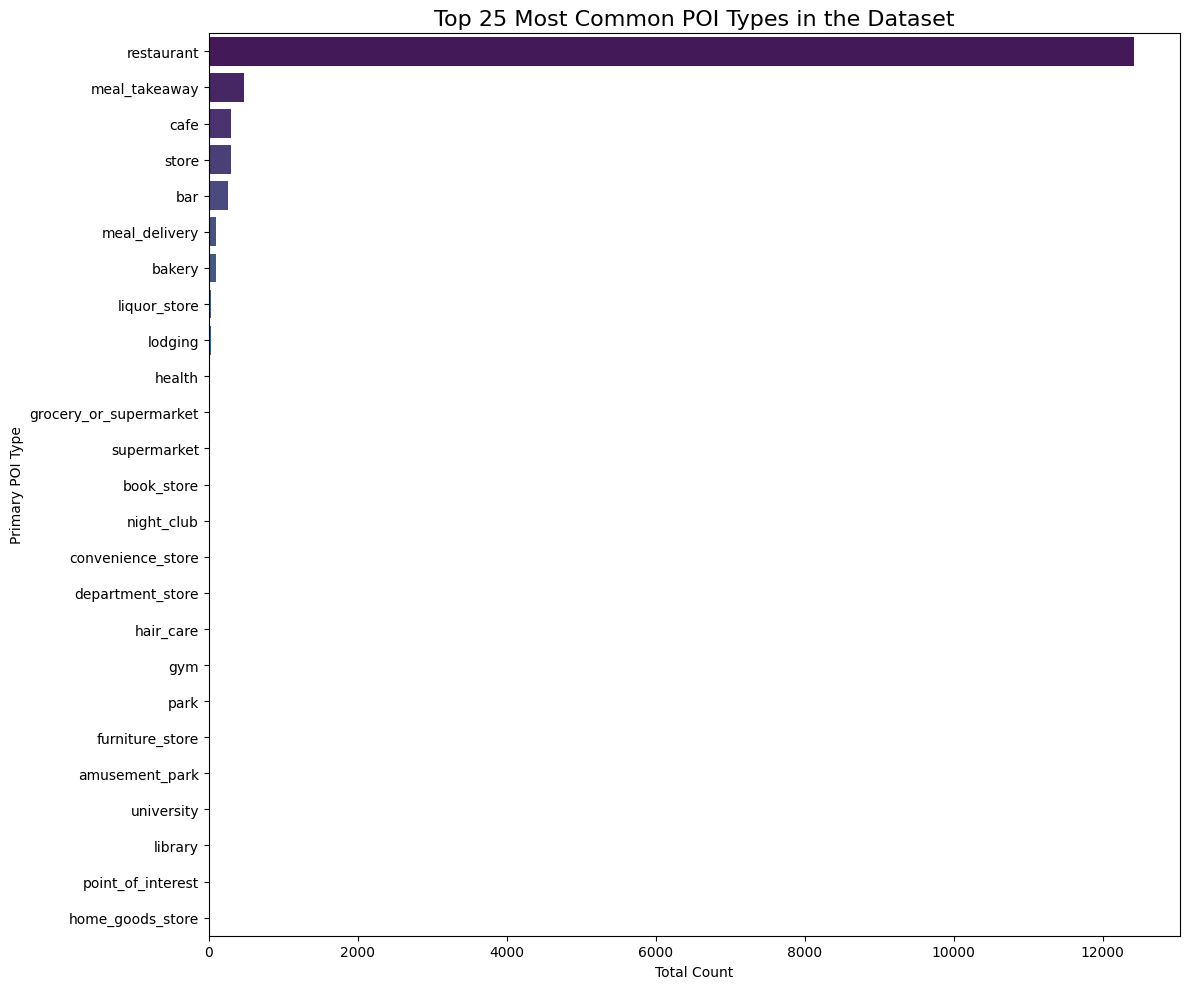


✅ Analysis complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Analyzing the Distribution of Raw POI Types (Corrected) ---")

# --- 1. Load the Raw POI Data ---
poi_file_path = "/content/drive/MyDrive/Youbike_Master_Project/YouBike_Demand_Forecast/data/youbike_poi_output.csv"
df_poi_raw = pd.read_csv(poi_file_path)
print(f"Loaded {len(df_poi_raw)} raw POI records.")


# --- 2. Extract the Primary POI Type for Each Record ---
print("\nStep 2: Extracting the primary type from the 'types' column...")

# *** THE FIX IS HERE: We now split by the correct semicolon ';' delimiter ***
df_poi_raw['primary_type'] = df_poi_raw['types'].apply(lambda x: str(x).split(';')[0].strip())


# --- 3. Calculate the Frequency of Each Type ---
print("\nStep 3: Calculating the frequency of each primary POI type...")
type_counts = df_poi_raw['primary_type'].value_counts()

print("\n--- Top 20 Most Common POI Types ---")
print(type_counts.head(20))


# --- 4. Visualize the Top N Most Common Types ---
print("\nStep 4: Generating visualization...")

top_n = 25
top_types = type_counts.head(top_n)

plt.figure(figsize=(12, 10))
sns.barplot(x=top_types.values, y=top_types.index, palette='viridis')
plt.title(f'Top {top_n} Most Common POI Types in the Dataset', fontsize=16)
plt.xlabel('Total Count')
plt.ylabel('Primary POI Type')
plt.tight_layout()
plt.show()

print("\n✅ Analysis complete.")